# Primer paso - Reconocimiento de los datos



# Objetivo Analizado

## Nuestro principal objetivo a analizar es la variable de KPI_score , para ello vamos a averiguar si tiene algún tipo de correlación con las otras variables numéricas

In [1]:
#Instalando e importando pandas
import pandas
from sklearn.model_selection import train_test_split

datasetOriginal = pandas.read_csv("logistics_dataset.csv")

print("DATASET ORIGINAL")
# datasetOriginal.head()
datasetOriginal.describe()
# datasetOriginal.info()

DATASET ORIGINAL


,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,picking_time_seconds,handling_cost_per_unit,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,forecasted_demand_next_7d,KPI_score
count,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000
mean,263.491573,54.759363,8.507803,5.578340,25.435868,5.260078,0.542325,95.606429,2.777116,105.887575,1.045993,4.602372,0.849738,521.714732,8.123677,0.600581,154.286245,0.601737
std,138.568360,26.053354,3.473229,2.292486,14.038861,2.725639,0.259200,49.218084,1.305213,54.428161,0.550480,2.883708,0.086703,276.768531,4.069191,0.230511,82.945255,0.108286
min,20.000000,10.000000,3.000000,2.000000,1.010000,0.500000,0.100000,10.000000,0.500000,10.220000,0.100000,0.000000,0.700000,50.000000,1.000000,0.200000,10.090000,0.259000
25%,144.000000,32.000000,5.000000,4.000000,13.535000,2.917500,0.310000,53.000000,1.660000,59.760000,0.580000,2.000000,0.780000,283.000000,4.590000,0.400000,83.190000,0.527000
50%,264.000000,55.000000,9.000000,6.000000,25.405000,5.235000,0.540000,96.000000,2.810000,106.005000,1.050000,5.000000,0.850000,513.500000,8.150000,0.600000,152.870000,0.601000
75%,386.000000,78.000000,12.000000,8.000000,37.412500,7.542500,0.760000,138.000000,3.910000,152.410000,1.522500,7.000000,0.920000,764.250000,11.692500,0.800000,225.440000,0.677250
max,499.000000,99.000000,14.000000,9.000000,49.980000,10.000000,1.000000,179.000000,5.000000,200.000000,2.000000,9.000000,1.000000,999.000000,15.000000,1.000000,299.940000,0.936000


In [2]:
print("Analisis para variables categóricas")

datasetOriginal.nunique().to_frame()

Analisis para variables categóricas


,0
item_id,3204
category,5
stock_level,479
reorder_point,90
reorder_frequency_days,12
lead_time_days,8
daily_demand,2375
demand_std_dev,910
item_popularity_score,91
storage_location_id,100


In [3]:
import matplotlib.pyplot as pyplot
import seaborn as sb
import math
import scipy.stats as stats
import numpy

# Preprocesamiento de los datos

INTERPRETATION DE LAS DISTRIBUCIONES DE LAS VARIABLES NUMERICAS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   stock_level                3204 non-null   int64  
 1   reorder_point              3204 non-null   int64  
 2   reorder_frequency_days     3204 non-null   int64  
 3   lead_time_days             3204 non-null   int64  
 4   daily_demand               3204 non-null   float64
 5   demand_std_dev             3204 non-null   float64
 6   item_popularity_score      3204 non-null   float64
 7   picking_time_seconds       3204 non-null   int64  
 8   handling_cost_per_unit     3204 non-null   float64
 9   unit_price                 3204 non-null   float64
 10  holding_cost_per_unit_day  3204 non-null   float64
 11  stockout_count_last_month  3204 non-null   int64  
 12  order_fulfillment_rate     3204 non-null

<Figure size 1500x1000 with 0 Axes>

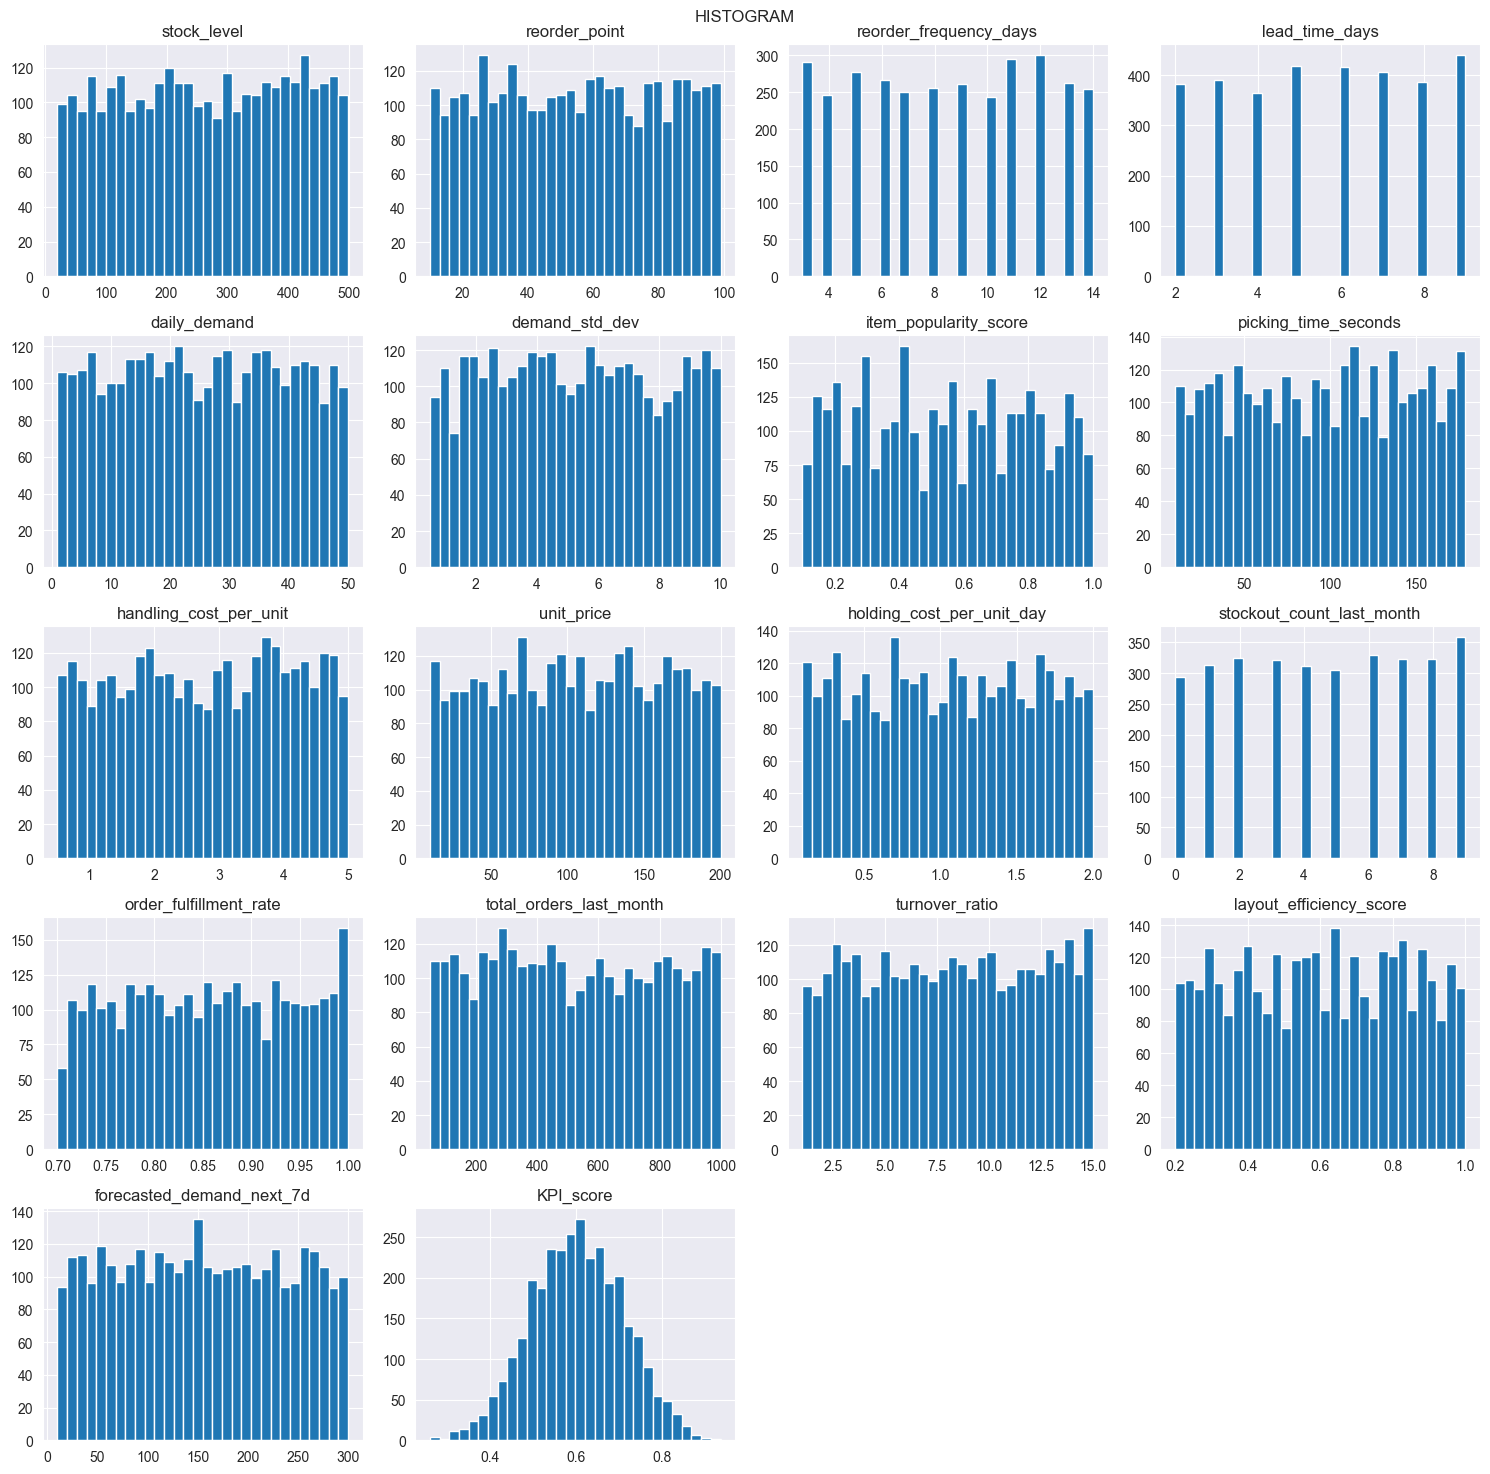

<module 'matplotlib.pyplot' from '/Users/jorgeluisgamboacristancho/PyCharmMiscProject/.venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [4]:
print("INTERPRETATION DE LAS DISTRIBUCIONES DE LAS VARIABLES NUMERICAS")

#HISTOGRAMAS

datasetOriginalNumberColumns = datasetOriginal.select_dtypes(include=[numpy.number])
datasetOriginalNumberColumns.info()

pyplot.figure(figsize=(15,10))
datasetOriginalNumberColumns.hist(bins=30 , figsize=(15,15))
pyplot.suptitle("HISTOGRAM")
pyplot.tight_layout()
pyplot.show()




pyplot

# Interpretación General de los Histogramas

### -La mayoría de las variables tienen distribuciones uniformes, lo que sugiere que: El dataset es altamente equilibrado.
### -No se observan outliers fuertes. Esto indica que los datos están limpios o fueron generados bajo rangos controlados.
### -La única variable con distribución natural (normal) es KPI_score, lo que tiene sentido al ser un indicador compuesto.

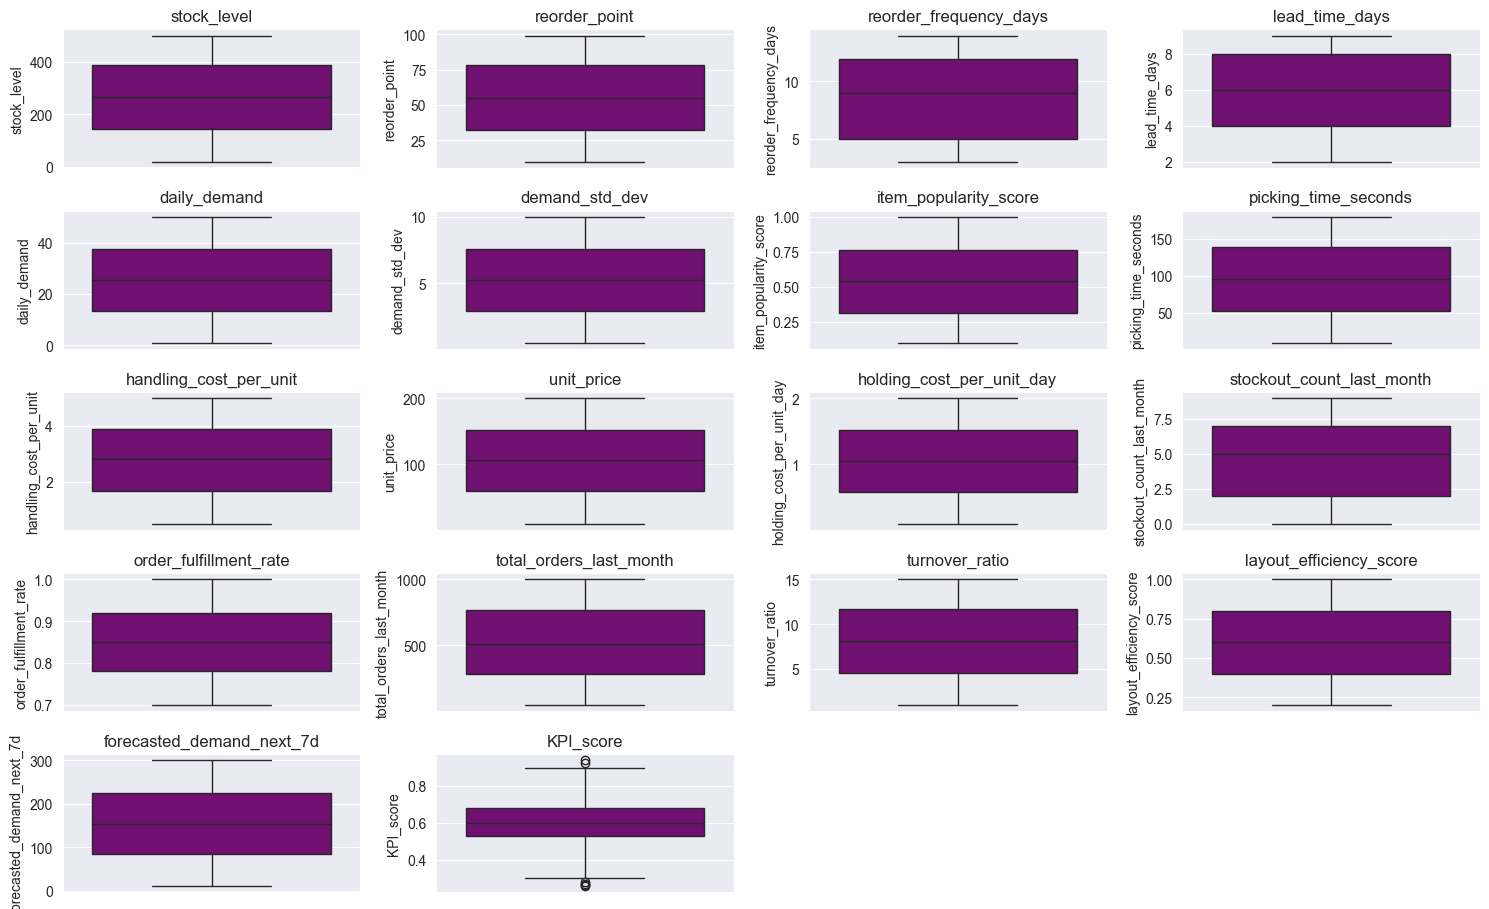

In [5]:
#DIAGRAMAS DE BIGOTES
numCols = len(datasetOriginalNumberColumns.columns)

cols = 4
rows = math.ceil(numCols/cols)

pyplot.figure(figsize=(15,10))

for i, column in enumerate(datasetOriginalNumberColumns, 1):
    pyplot.subplot(rows, cols, i)
    sb.boxplot(data = datasetOriginalNumberColumns[column], color = 'purple')
    pyplot.title(column)

pyplot.tight_layout(rect=[0,0.03, 1, 0.95])
pyplot.show()

# Interpretación Gráfico de Bigotes

### Se observa que los datos se encuentran limpios, debido que no se cuenta con outliers o valores atípicos a excepción de la variable de KPI score donde se evidencia datos por debajo de 0.3 y por encima de 0.9. Adicionalmente, la mayoría de las variables presentan distribuciones relativamente simétricas con rangos intercuartílicos bien definidos, lo que sugiere una recolección de datos consistente. Variables como order_fulfillment_rate, item_popularity_score y layout_efficiency_score muestran concentraciones de valores dentro de rangos específicos sin desviaciones extremas.



INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES CATEGORICAS


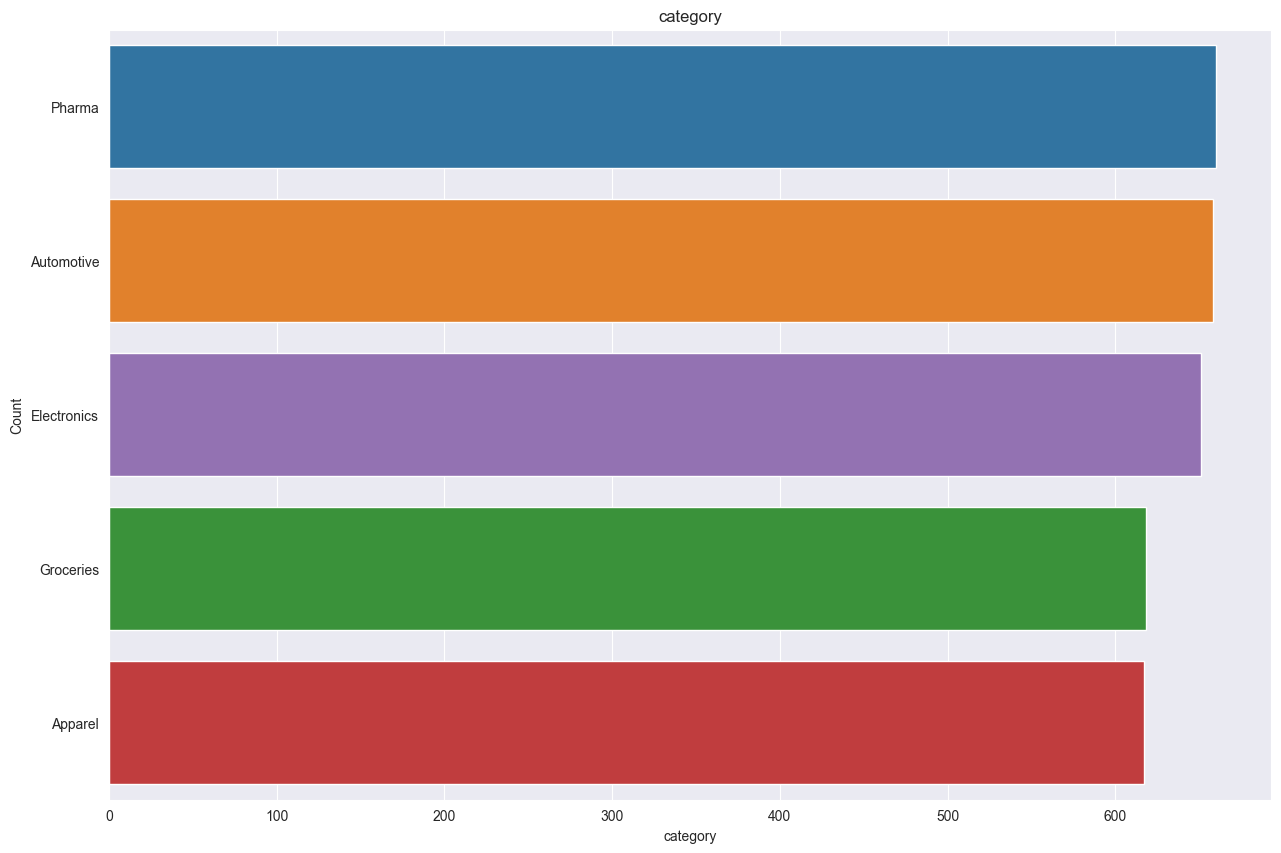

In [6]:
#QQ PLOTS
print("INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES CATEGORICAS")
datasetOriginalCategoryColumns = datasetOriginal.select_dtypes(exclude=[numpy.number])

# datasetOriginalCategoryColumns.info()
datasetOriginalCategoryColumns.head()

pyplot.figure(figsize=(15,10))
sb.countplot(y = datasetOriginal['category'], data = datasetOriginal,order=datasetOriginal['category'].value_counts().index, hue='category', dodge=False)
pyplot.title('category')
pyplot.xlabel('category')
pyplot.ylabel('Count')
pyplot.show()


# Interpretación de la distribución de las variables categóricas

### En este gráfico se muestra la distribución de productos por categoría en el dataset. Se observa que Pharma (productos farmacéuticos) es la categoría más representada con aproximadamente 650 productos, seguida muy de cerca por Automotive (automotriz) y Electronics (electrónica), ambas con alrededor de 640 productos. Las categorías Groceries (abarrotes) y Apparel (ropa/vestimenta) tienen una representación ligeramente menor, con aproximadamente 620 productos cada una. En general, la distribución es bastante equilibrada entre las cinco categorías, con diferencias relativamente pequeñas en los conteos, lo que sugiere que el dataset no presenta un sesgo significativo hacia ninguna categoría en particular. Este balance es positivo para el análisis, ya que permite comparaciones equitativas entre categorías y evita que los resultados estén dominados por un solo tipo de producto.

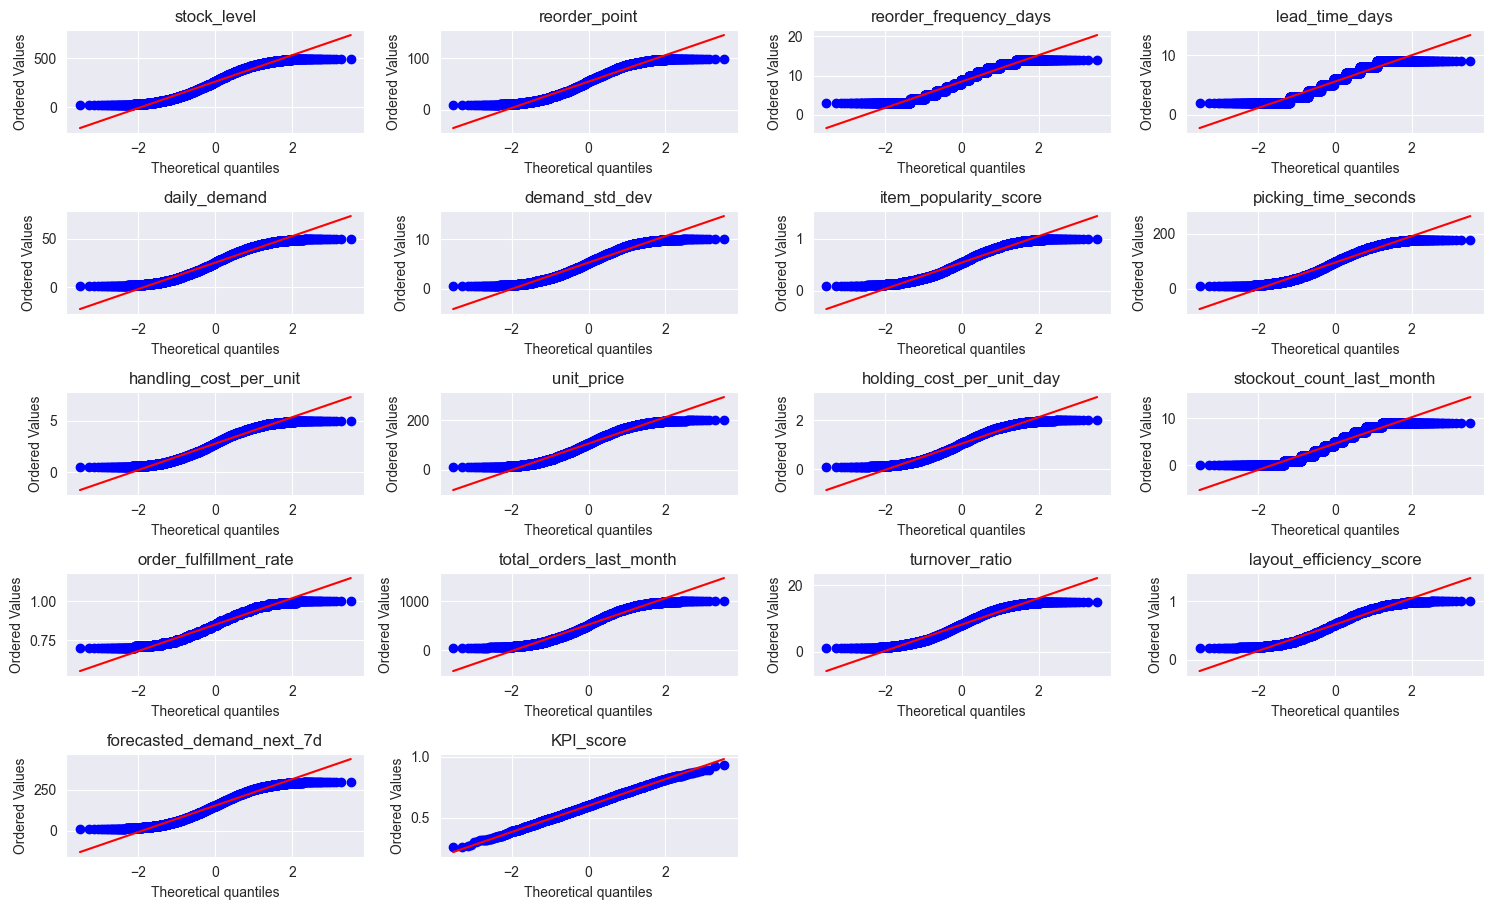

In [7]:
# QQ Plots
numCols = len(datasetOriginalNumberColumns.columns)
cols = 4
rows  = math.ceil(numCols / cols)
pyplot.figure(figsize=(15,10))

for i, column in enumerate(datasetOriginalNumberColumns, 1):
    pyplot.subplot(rows, cols, i)
    stats.probplot(datasetOriginalNumberColumns[column], plot=pyplot, dist="norm")
    pyplot.title(column)

pyplot.tight_layout(rect=[0, 0.03, 1, 0.95])
pyplot.show()

# Interpretación de QQ plot

### Este gráfico Q-Q (Quantile-Quantile) evalúa la normalidad de las variables comparando sus cuantiles observados contra los teóricos de una distribución normal estándar. En general, se observa que la mayoría de las variables presentan un comportamiento aproximadamente normal en sus regiones centrales, donde los puntos azules se alinean relativamente bien con la línea roja de referencia. Sin embargo, existen desviaciones notables en los extremos de las distribuciones, especialmente en las colas superiores, donde los puntos se separan de la línea teórica, indicando la presencia de valores más extremos de lo esperado en una distribución perfectamente normal. Variables como stock_level, reorder_point, turnover_ratio y total_orders_last_month muestran curvaturas más pronunciadas, sugiriendo distribuciones con asimetría positiva o colas pesadas. El KPI_score presenta desviaciones en ambos extremos, consistente con los valores atípicos previamente identificados. 

In [8]:
datasetOriginalCategoryColumns.head()

,item_id,category,storage_location_id,zone,last_restock_date
0,ITM10000,Pharma,L82,B,2024-02-17
1,ITM10001,Automotive,L15,A,2024-10-01
2,ITM10002,Groceries,L4,B,2024-04-07
3,ITM10003,Automotive,L95,A,2024-01-27
4,ITM10004,Automotive,L36,D,2024-05-17


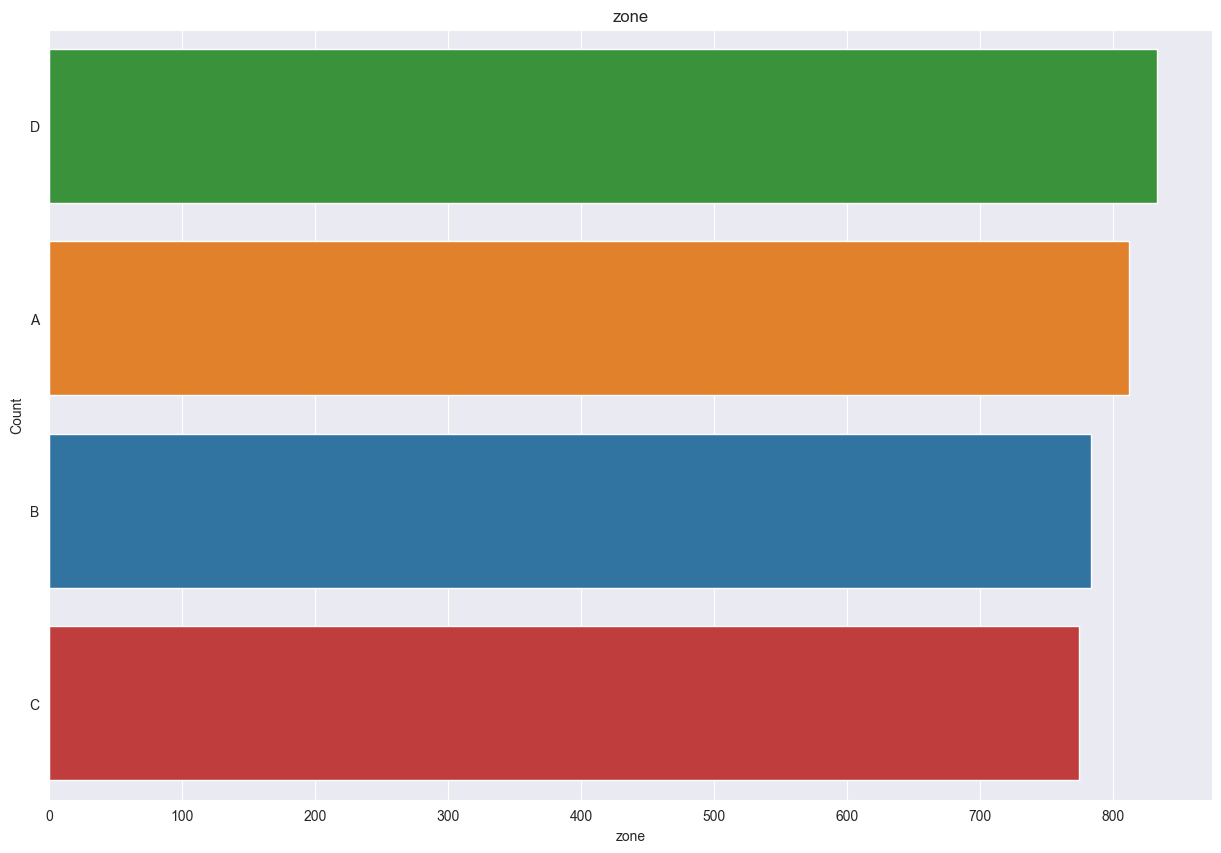

In [9]:
datasetOriginalCategoryColumns.head()
datasetOriginalCategoryColumns = datasetOriginal.select_dtypes(exclude=[numpy.number])
pyplot.figure(figsize=(15,10))
sb.countplot(y = datasetOriginal['zone'], data = datasetOriginal,order=datasetOriginal['zone'].value_counts().index, hue='zone', dodge=False)
pyplot.title('zone')
pyplot.xlabel('zone')
pyplot.ylabel('Count')
pyplot.show()

# Grafico de barras de Zonas
### La distribución de productos según la zona de almacenamiento. Se observa una distribución relativamente equilibrada entre las cuatro zonas: D (aproximadamente 830 productos), A (aproximadamente 820 productos), B (aproximadamente 780 productos) y C (aproximadamente 770 productos). Las diferencias entre zonas son mínimas, lo que sugiere que el inventario está distribuido de manera bastante uniforme a lo largo del almacén, sin concentraciones excesivas en ninguna área particular. Esta distribución balanceada facilita la gestión operativa y puede contribuir a optimizar los tiempos de picking y el flujo de trabajo en el almacén.Retry

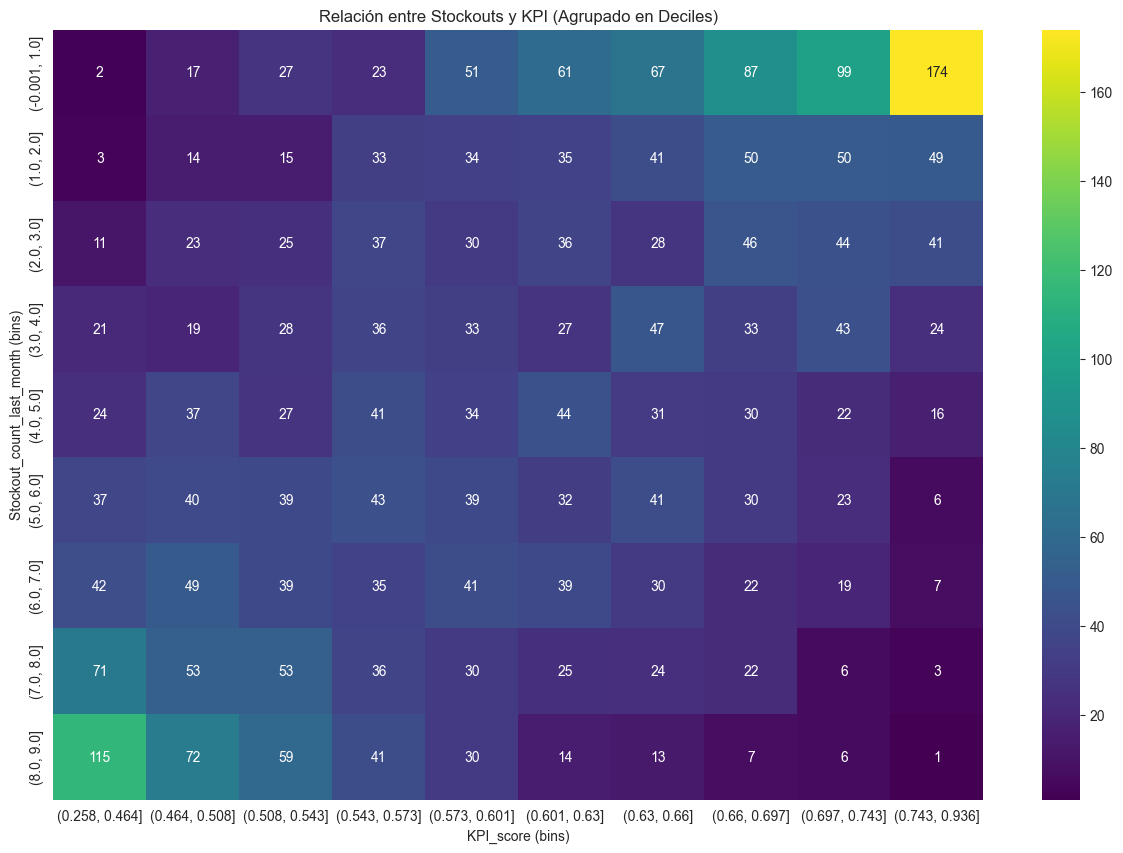

In [10]:
# Agrupar ambas columnas en 10 rangos (deciles)
datasetOriginalNumberColumns['stockout_bin'] = pandas.qcut(datasetOriginalNumberColumns['stockout_count_last_month'], q=10, duplicates='drop')
datasetOriginalNumberColumns['KPI_bin'] = pandas.qcut(datasetOriginalNumberColumns['KPI_score'], q=10)

# Crear la tabla cruzada
cross_table = pandas.crosstab(
    datasetOriginalNumberColumns['stockout_bin'],
    datasetOriginalNumberColumns['KPI_bin']
)

# Graficar el heatmap
pyplot.figure(figsize=(15,10))
sb.heatmap(cross_table, annot=True, fmt='d', cmap='viridis')
pyplot.title('Relación entre Stockouts y KPI (Agrupado en Deciles)')
pyplot.xlabel('KPI_score (bins)')
pyplot.ylabel('Stockout_count_last_month (bins)')
pyplot.show()

# Relación entre Stockouts y KPI:
### Este heatmap revela una relación inversa clara entre el número de agotamientos de stock y el desempeño general. Los productos con menos stockouts (rango 0.0-1.0) tienden a concentrarse en las categorías de KPI más altas (0.743-0.936), con 174 productos destacándose en el mejor rendimiento. Por el contrario, productos con mayor frecuencia de stockouts (8.0-9.0) se agrupan predominantemente en rangos de KPI más bajos, con 115 productos en la categoría de peor desempeño (0.258-0.464). Esta distribución confirma que minimizar los quiebres de stock es fundamental para mantener un alto desempeño operativo, y sugiere que las estrategias de gestión de inventario deben priorizar la reducción de stockouts como métrica crítica.

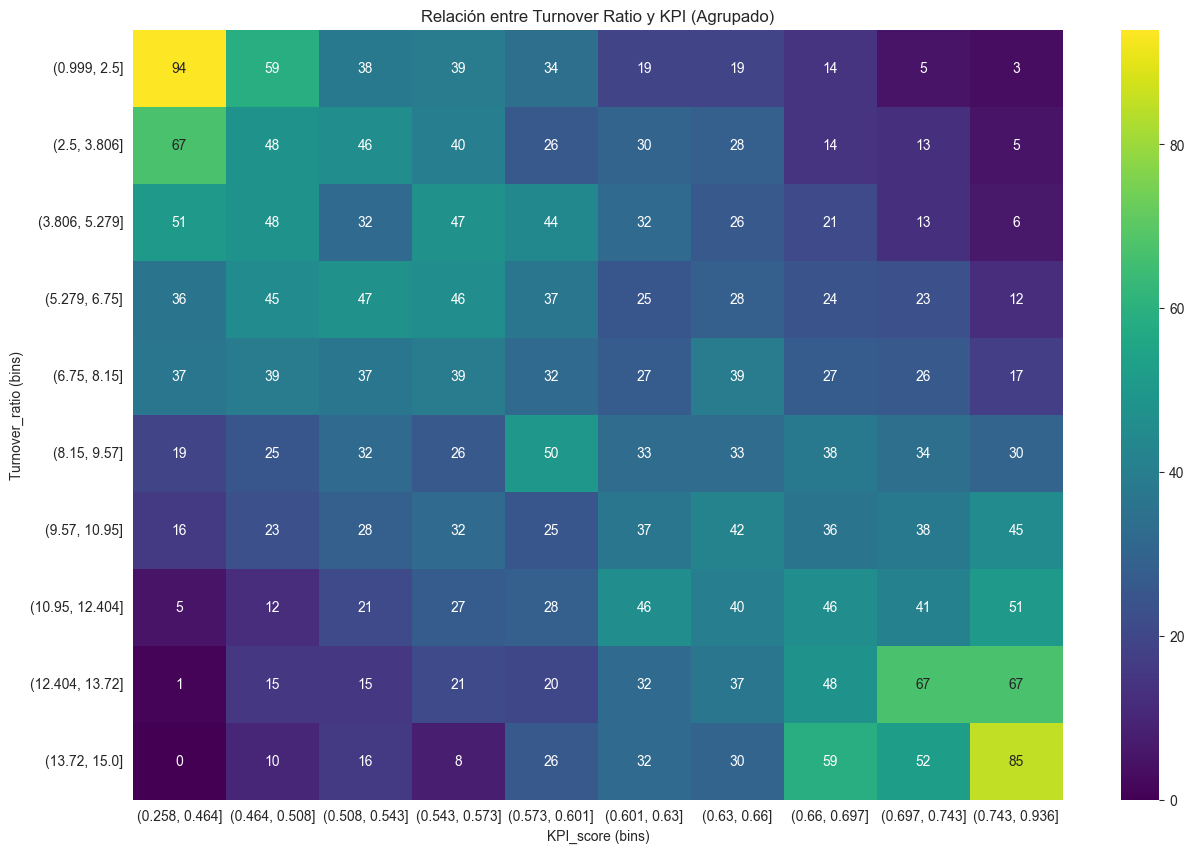

In [11]:
# Crear intervalos (bins)
datasetOriginalNumberColumns['turnover_bin'] = pandas.qcut(datasetOriginalNumberColumns['turnover_ratio'], q=10)
datasetOriginalNumberColumns['KPI_bin'] = pandas.qcut(datasetOriginalNumberColumns['KPI_score'], q=10)

# Generar tabla cruzada
cross_table = pandas.crosstab(datasetOriginalNumberColumns['turnover_bin'], datasetOriginalNumberColumns['KPI_bin'])

# Graficar
pyplot.figure(figsize=(15,10))
sb.heatmap(cross_table, annot=True, fmt='d', cmap='viridis')
pyplot.title('Relación entre Turnover Ratio y KPI (Agrupado)')
pyplot.xlabel('KPI_score (bins)')
pyplot.ylabel('Turnover_ratio (bins)')
pyplot.show()

# Relación entre Turnover Ratio y KPI:
### ste heatmap muestra una correlación positiva entre la rotación de inventario y el rendimiento. Los productos con turnover ratio más bajo (0.999-2.5) se concentran fuertemente en categorías de KPI bajo (94 productos en el rango 0.258-0.464), mientras que productos con alta rotación (13.72-15.0) predominan en categorías de KPI alto, con 85 productos en el mejor rango de desempeño (0.743-0.936). La distribución diagonal de las concentraciones más altas confirma que una mayor velocidad de rotación del inventario está directamente asociada con mejor eficiencia operativa. Esto sugiere que el negocio debe enfocarse en acelerar la rotación de productos de movimiento lento para mejorar el desempeño general del sistema.

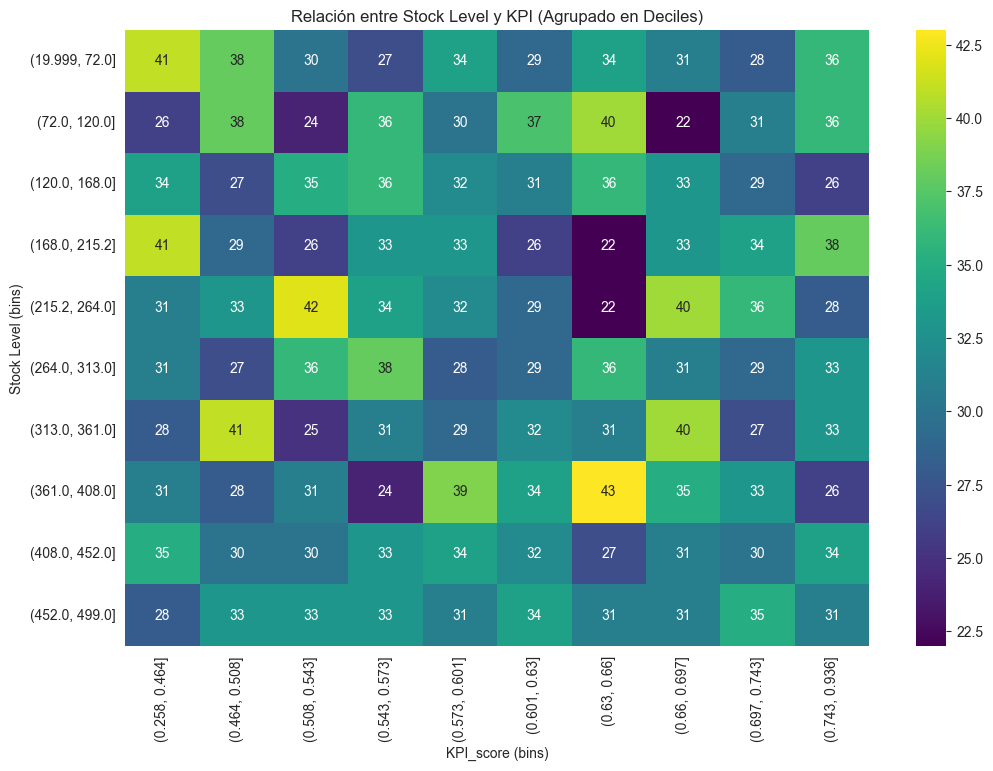

In [12]:
 #Discretizamos ambas columnas
datasetOriginalNumberColumns['stock_level_bin'] = pandas.qcut(datasetOriginalNumberColumns['stock_level'], q=10)
datasetOriginalNumberColumns['KPI_score_bin'] = pandas.qcut(datasetOriginalNumberColumns['KPI_score'], q=10)

# Tabla cruzada entre los intervalos
cross_table = pandas.crosstab(datasetOriginalNumberColumns['stock_level_bin'], datasetOriginalNumberColumns['KPI_score_bin'])

# Graficamos
pyplot.figure(figsize=(12,8))
sb.heatmap(cross_table, annot=True, fmt='d', cmap='viridis')
pyplot.title('Relación entre Stock Level y KPI (Agrupado en Deciles)')
pyplot.xlabel('KPI_score (bins)')
pyplot.ylabel('Stock Level (bins)')
pyplot.show()

# Relación entre Stock Level y KPI:
### Este heatmap presenta una distribución más uniforme comparada con las anteriores, indicando que el nivel absoluto de stock tiene una relación menos directa con el KPI que otras variables. Las frecuencias se distribuyen relativamente equilibradas a lo largo de todos los rangos de stock y KPI, con valores que oscilan principalmente entre 22 y 43 productos por celda. No se observa un patrón claro de concentración que sugiera que mayores o menores niveles de inventario garanticen mejor desempeño. Esto implica que no es tanto la cantidad de stock lo que importa, sino más bien cómo se gestiona ese inventario (rotación, disponibilidad, etc.), reforzando la idea de que la eficiencia operativa depende de la estrategia de gestión más que del volumen absoluto almacenado.

# Revision de datos faltantes
### Este ejercicio es realizado con otro dataset debido a que nuestro dataset del proyecto se encuentra totalmente limpio de datos faltantes

In [13]:
datasetAgricultura = pandas.read_csv("agricultural.csv")
datasetAgricultura.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [14]:
datasetAgricultura.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

In [15]:
print("IDENTIFICACIÓN DE VALORES NULOS POR PORCENTAJE")
totalrows= len(datasetAgricultura)
missingPercentage= datasetAgricultura.isnull().sum() / totalrows*100
print (missingPercentage)

IDENTIFICACIÓN DE VALORES NULOS POR PORCENTAJE
Month                           0.000000
Coarse wool Price               9.418283
Coarse wool price % Change      9.418283
Copra Price                     6.094183
Copra price % Change            6.094183
Cotton Price                    0.000000
Cotton price % Change           0.000000
Fine wool Price                 9.418283
Fine wool price % Change        9.418283
Hard log Price                  0.000000
Hard log price % Change         0.000000
Hard sawnwood Price             9.418283
Hard sawnwood price % Change    9.418283
Hide Price                      9.418283
Hide price % change             9.418283
Plywood Price                   0.000000
Plywood price % Change          0.000000
Rubber Price                    0.000000
Rubber price % Change           0.000000
Softlog Price                   9.418283
Softlog price % Change          9.418283
Soft sawnwood Price             9.418283
Soft sawnwood price % Change    9.418283
Wood pulp 

revisión gráfica valores nulos


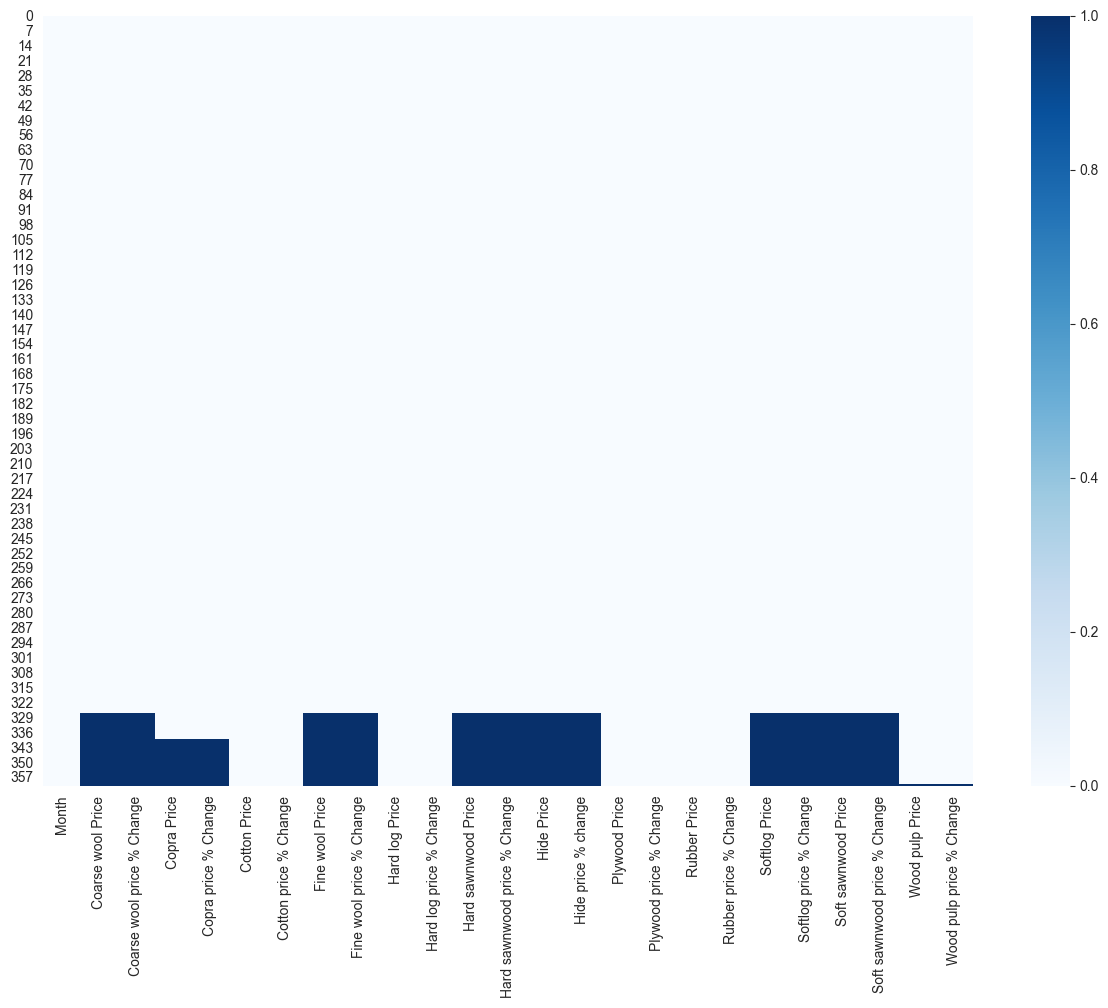

In [16]:
print("revisión gráfica valores nulos")
pyplot.figure(figsize=(15,10))
sb.heatmap(datasetAgricultura.isnull(), annot=False, fmt='d', cmap='Blues')
pyplot.show()

# Grafico de datos nulos del dataset Agricultural
### En este gráfico se puede observar que efectivamente ese dataset cuenta con datos nulos y por lo tanto se debe realizar una limpieza de datos (eliminación o imputación) , para nuestro caso aplicamos eliminación al ser un 9% de los datos totales.

In [17]:
#Revisión datos faltantes
#manejo de datos faltantes
datasetAgriculturaClean=datasetAgricultura.copy()
datasetAgriculturaClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [18]:
#eliminar filas que contengan valores nulos o faltantes
datasetAgriculturaClean = datasetAgricultura.dropna()
datasetAgriculturaClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327 entries, 0 to 326
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         327 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   327 non-null    object 
 4   Copra price % Change          327 non-null    object 
 5   Cotton Price                  327 non-null    float64
 6   Cotton price % Change         327 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                327 non-null    float64
 10  Hard log price % Change       327 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide Price

In [19]:
datasetAgriculturaClean.isnull().sum()

Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64

# Aqui de igual modo aplicamos la verificacion de datos faltantes a nuestro dataset de proyecto
### Los valores son 0 porque como se mencionó anteriormente nuestro dataset del proyecto se encuentra limpio de nulls

In [20]:
# revisión de datos faltantes
datasetOriginal.isnull().sum()

item_id                      0
category                     0
stock_level                  0
reorder_point                0
reorder_frequency_days       0
lead_time_days               0
daily_demand                 0
demand_std_dev               0
item_popularity_score        0
storage_location_id          0
zone                         0
picking_time_seconds         0
handling_cost_per_unit       0
unit_price                   0
holding_cost_per_unit_day    0
stockout_count_last_month    0
order_fulfillment_rate       0
total_orders_last_month      0
turnover_ratio               0
layout_efficiency_score      0
last_restock_date            0
forecasted_demand_next_7d    0
KPI_score                    0
dtype: int64

In [21]:
print("IDENTIFICACIÓN DE VALORES NULOS POR PORCENTAJE")
totalrows= len(datasetOriginal)
missingPercentage= datasetOriginal.isnull().sum() / totalrows*100
print (missingPercentage)

IDENTIFICACIÓN DE VALORES NULOS POR PORCENTAJE
item_id                      0.0
category                     0.0
stock_level                  0.0
reorder_point                0.0
reorder_frequency_days       0.0
lead_time_days               0.0
daily_demand                 0.0
demand_std_dev               0.0
item_popularity_score        0.0
storage_location_id          0.0
zone                         0.0
picking_time_seconds         0.0
handling_cost_per_unit       0.0
unit_price                   0.0
holding_cost_per_unit_day    0.0
stockout_count_last_month    0.0
order_fulfillment_rate       0.0
total_orders_last_month      0.0
turnover_ratio               0.0
layout_efficiency_score      0.0
last_restock_date            0.0
forecasted_demand_next_7d    0.0
KPI_score                    0.0
dtype: float64


revisión gráfica valores nulos


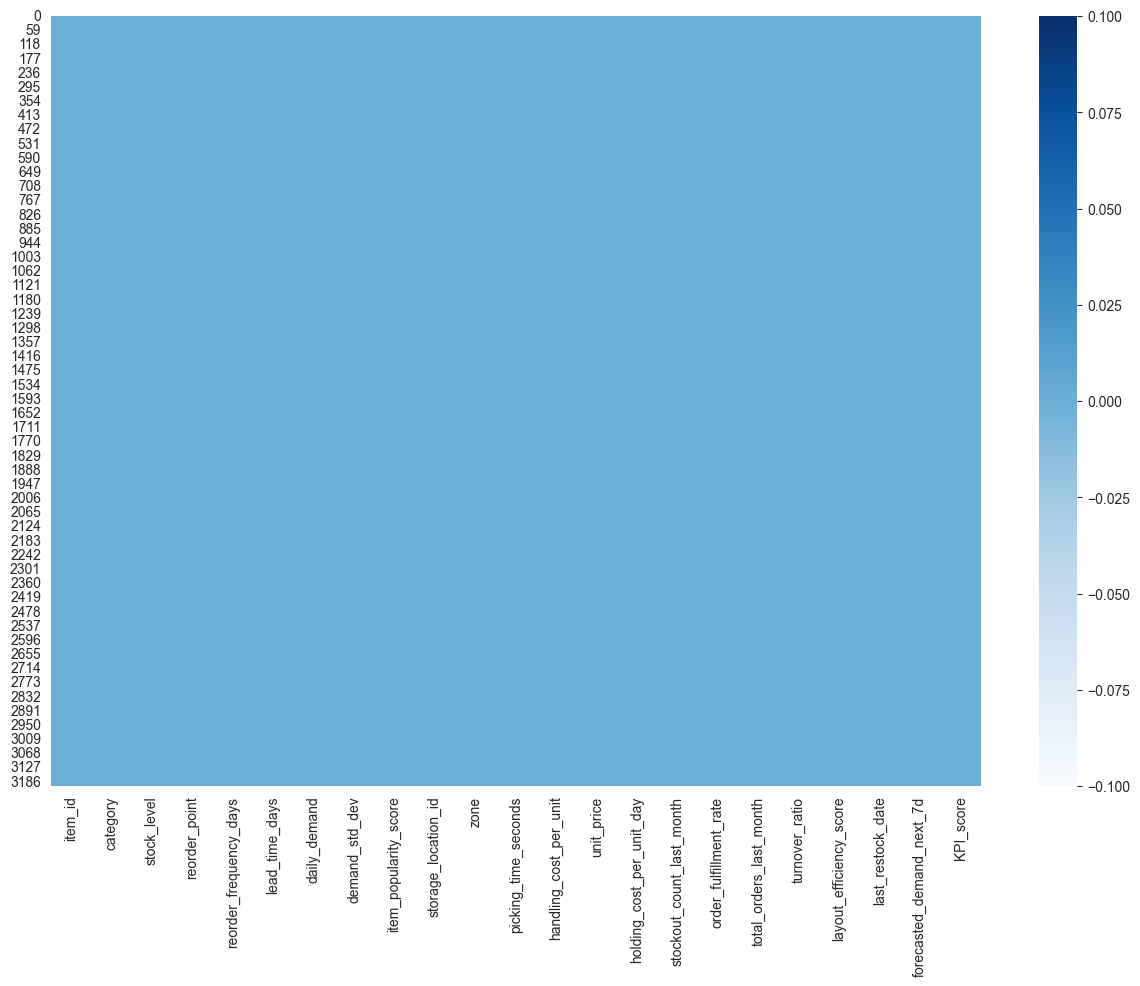

In [22]:
print("revisión gráfica valores nulos")
pyplot.figure(figsize=(15,10))
sb.heatmap(datasetOriginal.isnull(), annot=False, fmt='d', cmap='Blues')
pyplot.show()

# Grafico de valores nulos del proyecto

## En este gráfico podemos observar que no tenemos valores nulos en nuestro dataset del proyecto (se considera limpio de datos nulls)

In [23]:
#Revisión datos faltantes
#manejo de datos faltantes
datasetOriginalclean=datasetOriginal.copy()
datasetOriginalclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_id                    3204 non-null   object 
 1   category                   3204 non-null   object 
 2   stock_level                3204 non-null   int64  
 3   reorder_point              3204 non-null   int64  
 4   reorder_frequency_days     3204 non-null   int64  
 5   lead_time_days             3204 non-null   int64  
 6   daily_demand               3204 non-null   float64
 7   demand_std_dev             3204 non-null   float64
 8   item_popularity_score      3204 non-null   float64
 9   storage_location_id        3204 non-null   object 
 10  zone                       3204 non-null   object 
 11  picking_time_seconds       3204 non-null   int64  
 12  handling_cost_per_unit     3204 non-null   float64
 13  unit_price                 3204 non-null   float

In [24]:
#eliminar filas que contengan valores nulos o faltantes
datasetOriginalclean = datasetOriginal.dropna()

In [25]:
# # eliminar filas con valores nulos en una columna especifica
datasetOriginalcleancolumns = datasetOriginalclean.dropna(subset=['category'])
# print(datasetOriginalcleancolumns)

# Codificacion de variables categoricas

In [26]:
#Codificacion de variables categóricas
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
datasetOriginalclean['zone'] = encoder.fit_transform(datasetOriginalclean['zone'])
datasetOriginalclean['category'] = encoder.fit_transform(datasetOriginalclean['category'])


datasetOriginalclean['category']

datasetOriginalclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_id                    3204 non-null   object 
 1   category                   3204 non-null   int64  
 2   stock_level                3204 non-null   int64  
 3   reorder_point              3204 non-null   int64  
 4   reorder_frequency_days     3204 non-null   int64  
 5   lead_time_days             3204 non-null   int64  
 6   daily_demand               3204 non-null   float64
 7   demand_std_dev             3204 non-null   float64
 8   item_popularity_score      3204 non-null   float64
 9   storage_location_id        3204 non-null   object 
 10  zone                       3204 non-null   int64  
 11  picking_time_seconds       3204 non-null   int64  
 12  handling_cost_per_unit     3204 non-null   float64
 13  unit_price                 3204 non-null   float

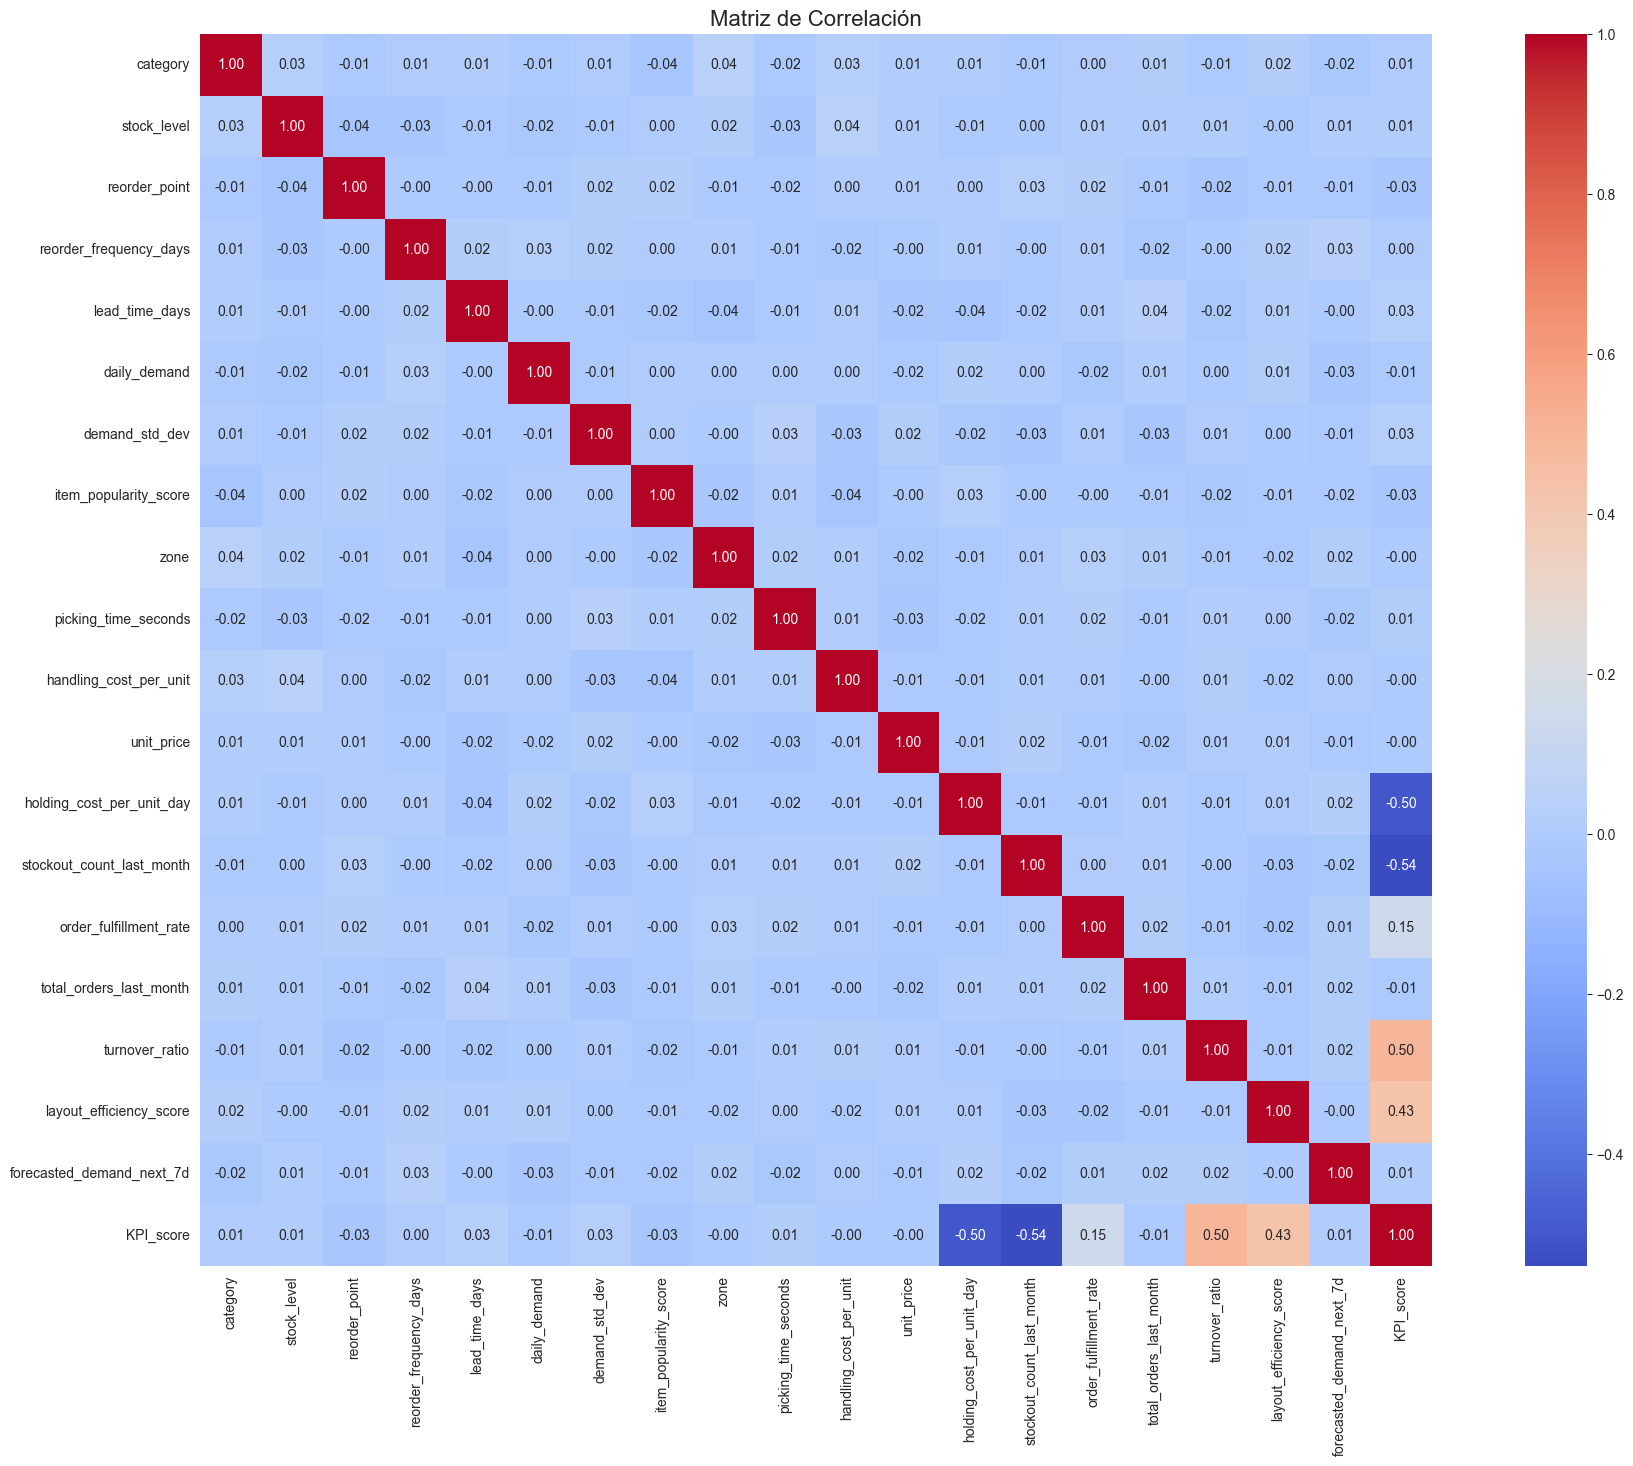

In [27]:
# Generar matriz de correlación
numeric_df = datasetOriginalclean.select_dtypes(include=['float64', 'int64'])

matrizParaModeloCategorias = datasetOriginalclean.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()
pyplot.figure(figsize=(24, 16))
sb.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
pyplot.title('Matriz de Correlación', fontsize=16)
pyplot.show()

# Matriz de correlacion
## Esta primera matriz se realiza con el objetivo de buscar que columnas se correlacionan entre si para disminuir las columnas que se van a manejar, aqui todavia no se han despejado de valores atipicos

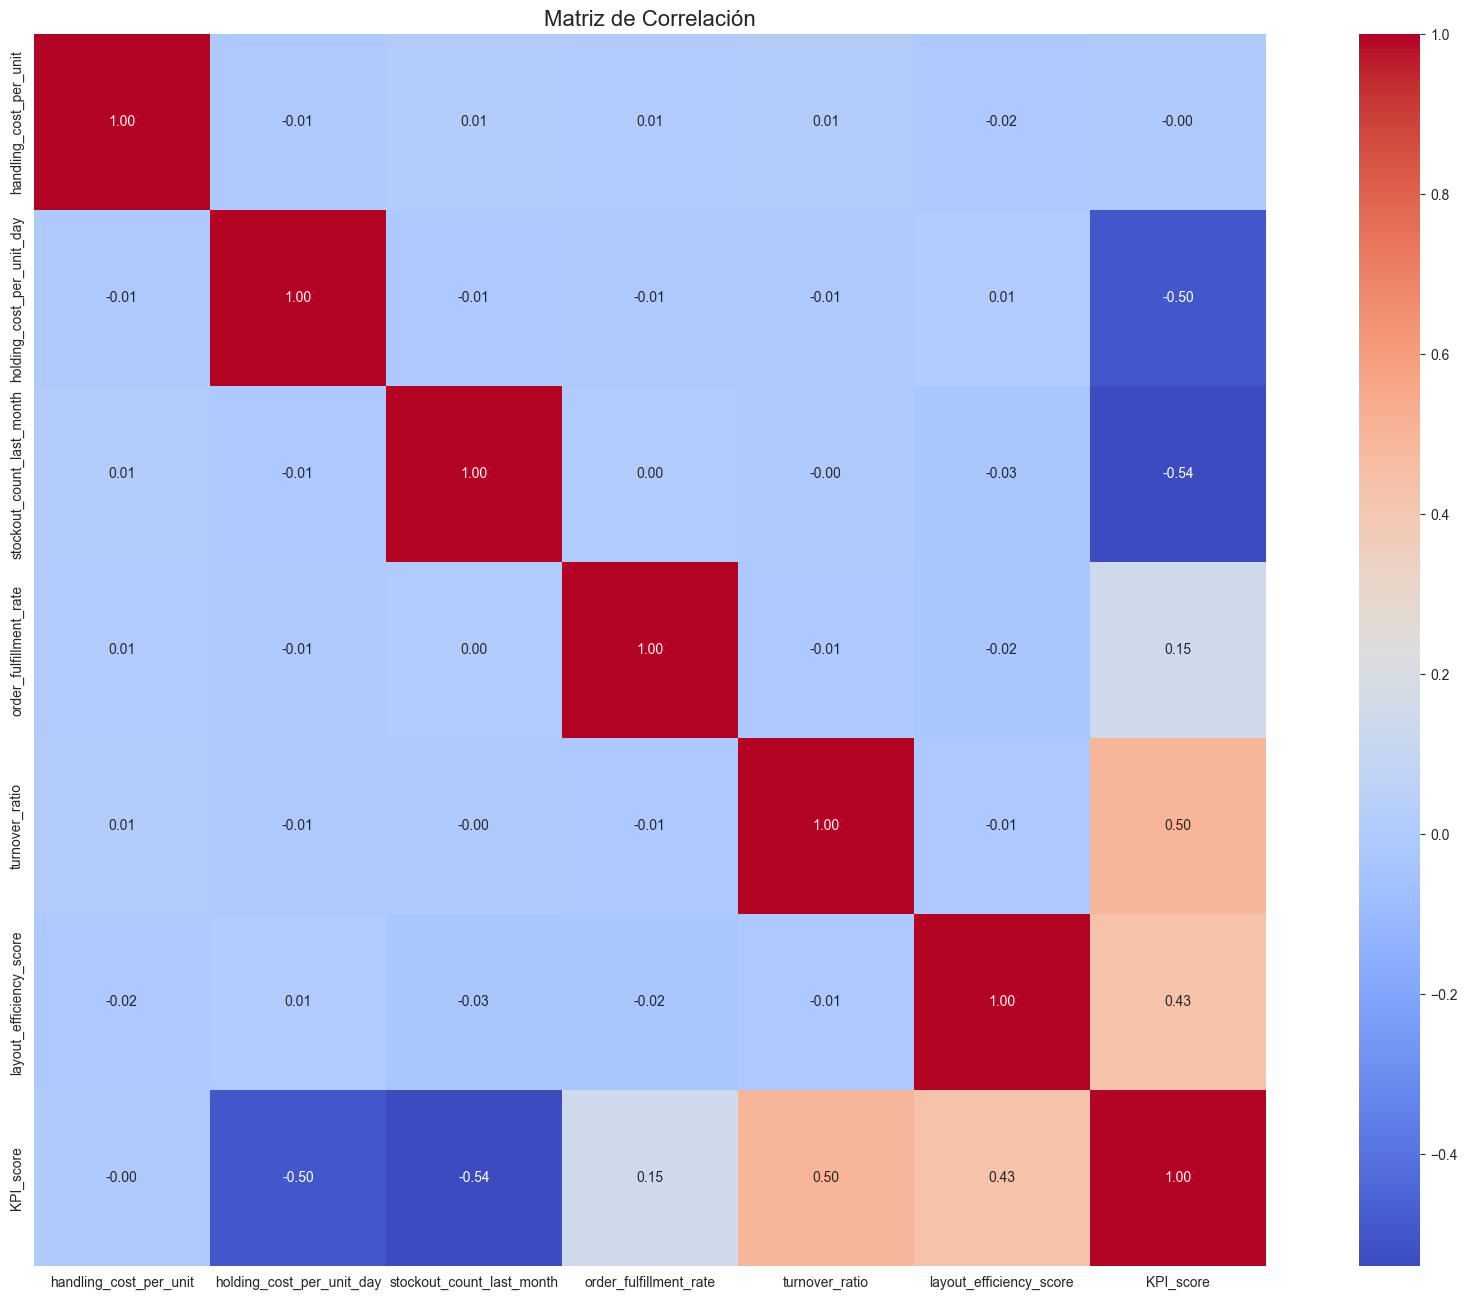

In [28]:
# Limpieza matriz de correlación
datasetOriginalMatriz = datasetOriginalcleancolumns.drop(columns = ['stock_level', 'reorder_point', 'reorder_frequency_days', 'lead_time_days', 'daily_demand', 'demand_std_dev', 'item_popularity_score', 'picking_time_seconds', 'unit_price', 'total_orders_last_month', 'forecasted_demand_next_7d'])

numeric_df = datasetOriginalMatriz.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
pyplot.figure(figsize=(24, 16))
sb.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
pyplot.title('Matriz de Correlación', fontsize=16)
pyplot.show()

# Matriz de Correlacion Simplificada
## En este paso se procede a dejar unicamente las columnas de interes

##### Con este codigo podemos obtener un informe EDA completo usando la libreria Ydata_profiling - es un reporte en html bastante completo (se encuentra comentado porque dentro de la carpeta ya lo tenemos ("informe_EDA.html"))


In [29]:
# from ydata_profiling import ProfileReport
# # Crear el informe EDA
# profile = ProfileReport(
#     datasetOriginal,
#     title="Informe de Análisis Exploratorio de Datos",
#     explorative=True
# )
#
# # Exportar a HTML
# profile.to_file("informe_EDAv2.html")


# Aplicamos Z - SCORE para quitar los valores atipicos o anomalos (outliers)


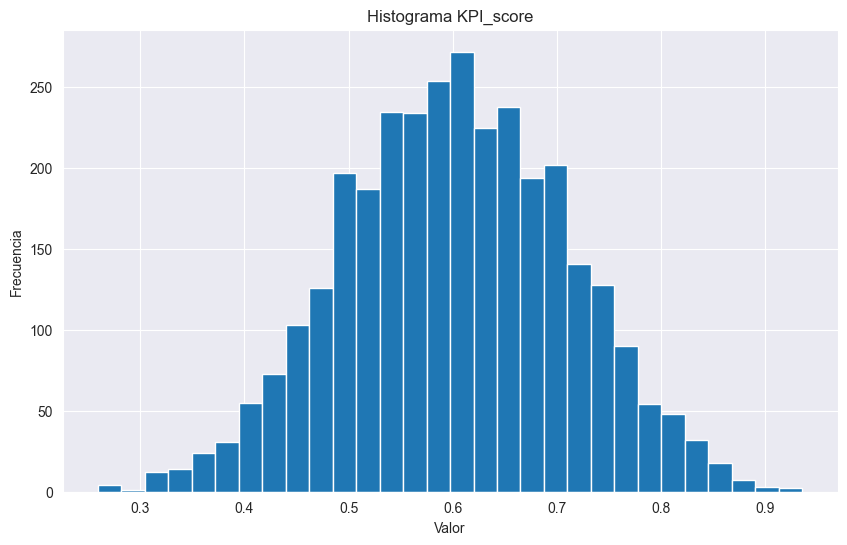

Aplicacion modeloo Z-SCORE
Numero de outliers:  434
Promedio de outliers:  0       0.422434
1       1.120019
2       0.722860
3       1.050499
4       0.630498
          ...   
3199    0.524033
3200    0.030142
3201    0.856538
3202    0.339308
3203    1.540020
Name: KPI_score, Length: 3204, dtype: float64


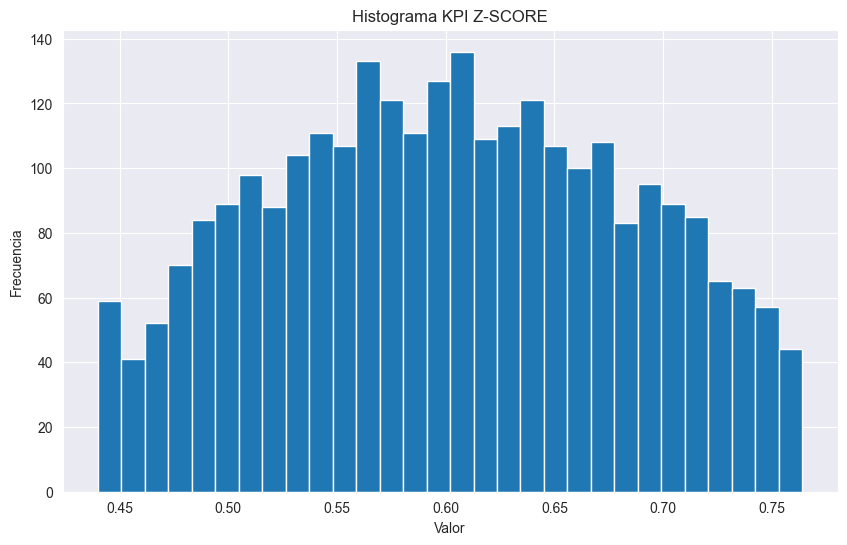

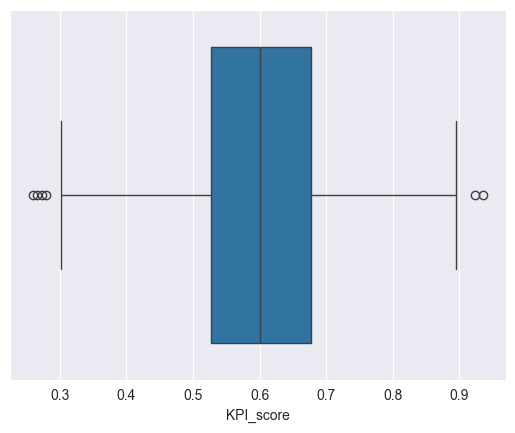

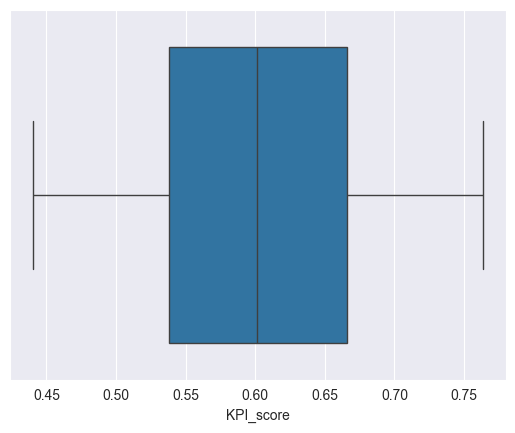

Numero de outliers Z-SCORE MEJORADO:  409


/Users/jorgeluisgamboacristancho/PyCharmMiscProject/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jorgeluisgamboacristancho/PyCharmMiscProject/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [30]:
# Detección y manejo de valores atípicos

from scipy.stats import zscore
import numpy as np
from pyod.models.mad import MAD

# Aplicacion de tecnicas para el manejo de valores atipicos
kpiScore = datasetOriginalMatriz['KPI_score']
pyplot.figure(figsize=(10, 6))  # Tamaño de la figura
kpiScore.hist(bins=30)  # Puedes cambiar el número de bins según lo que necesites
pyplot.title('Histograma KPI_score')
pyplot.xlabel('Valor')
pyplot.ylabel('Frecuencia')
pyplot.show()

# Aplicacion del Z-Score
datasetOriginalMatrizOutliers = datasetOriginalMatriz.copy()
print("Aplicacion modeloo Z-SCORE")
datasetOriginalMatrizOutliers['zscore'] = zscore(datasetOriginalMatriz['KPI_score'])
outliers = datasetOriginalMatrizOutliers[datasetOriginalMatrizOutliers['zscore'].abs() > 1.5]
zscores = zscore(datasetOriginalMatrizOutliers['KPI_score'])
abs_ZScores = np.abs(zscores)
print("Numero de outliers: ", len(outliers))
print("Promedio de outliers: ", abs_ZScores)

datasetOriginalMatrizZScore = pandas.merge(datasetOriginalMatrizOutliers, outliers, how='left', indicator=True).query(
    '_merge == "left_only"').drop('_merge', axis=1)

kpiScore = datasetOriginalMatrizZScore['KPI_score']
pyplot.figure(figsize=(10, 6))  # Tamaño de la figura
kpiScore.hist(bins=30)  # Puedes cambiar el número de bins según lo que necesites
pyplot.title('Histograma KPI Z-SCORE')
pyplot.xlabel('Valor')
pyplot.ylabel('Frecuencia')
pyplot.show()

sb.boxplot(x=datasetOriginal['KPI_score'])
pyplot.show()

sb.boxplot(x=datasetOriginalMatrizZScore['KPI_score'])
pyplot.show()

# Aplicacion del Z-Score MEJORADO
mad = MAD(threshold=1.5)
totalOutliers = datasetOriginalMatrizOutliers['KPI_score'].values.reshape(-1, 1)
labels = mad.fit(totalOutliers).labels_
print("Numero de outliers Z-SCORE MEJORADO: ", labels.sum())

##### En este apartado visualizamos el gráfico de barras y de bigotes antes y después de aplicar el z score sobre la variable de KPI_score para eliminar los outliers, aqui observamos directamente la diferencia entre sus distribuciones después de terminar con el proceso.

# Comparamos el % de datos eliminados (otliers) con la cantidad de datos originales, este valor debe ser inferior al 20%

In [31]:
totalRows = len(datasetOriginal)
totalRowsCleanColumns = len(datasetOriginalMatrizZScore)
totalRowsClean = len(datasetOriginalMatrizZScore)
totalCleanPercentage = 100 - totalRowsClean / totalRows * 100
print("Total de filas: ",  totalRowsCleanColumns)
print("Diferencia de filas después de la limpieza del dataset completo: ",  (totalRows - totalRowsClean))
print("Diferencia de filas en porcentaje después de quitar valores atipicos: ",  totalCleanPercentage)

Total de filas:  2770
Diferencia de filas después de la limpieza del dataset completo:  434
Diferencia de filas en porcentaje después de quitar valores atipicos:  13.54556803995007


# Ejemplo de Normalizacion y Escalado con la variable holding_cost_per_unit_day

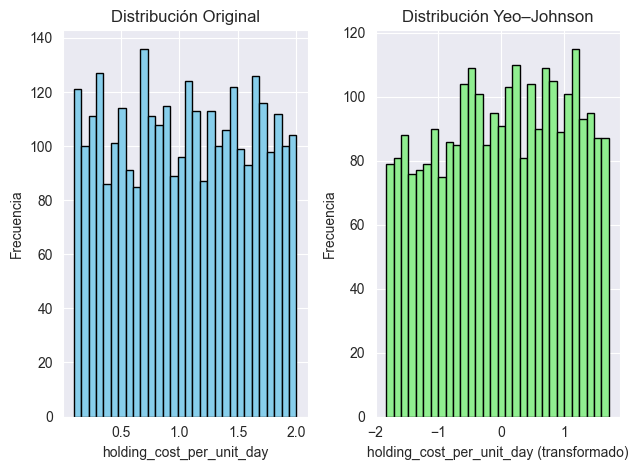

In [32]:
datasetOriginalMatrizTranformada = datasetOriginalMatrizZScore.copy()

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
datasetOriginalMatrizTranformada['holding_cost_per_unit_day'] = pt.fit_transform(
    datasetOriginalMatrizZScore[['holding_cost_per_unit_day']]
)

# Histograma original
pyplot.subplot(1,2,1)
pyplot.hist(datasetOriginal['holding_cost_per_unit_day'], bins=30, color='skyblue', edgecolor='black')
pyplot.title('Distribución Original')
pyplot.xlabel('holding_cost_per_unit_day')
pyplot.ylabel('Frecuencia')

# Histograma transformado
pyplot.subplot(1,2,2)
pyplot.hist(datasetOriginalMatrizTranformada['holding_cost_per_unit_day'], bins=30, color='lightgreen', edgecolor='black')
pyplot.title('Distribución Yeo–Johnson')
pyplot.xlabel('holding_cost_per_unit_day (transformado)')
pyplot.ylabel('Frecuencia')

pyplot.tight_layout()
pyplot.show()

# Gráfico comparativo entre la distribución de la variable "holding_cost_per_unit_day" antes y después de aplicarle normalización yeo-johnson que es un derivado de la box cox

In [33]:

# Seleccionar solo columnas numéricas
dataset_numerico_ZScore = datasetOriginalMatrizZScore.select_dtypes(include=['number'])
dataset_numerico_Transformada = datasetOriginalMatrizTranformada.select_dtypes(include=['number'])

# Calcular correlaciones
cor_original = dataset_numerico_ZScore.corr()
cor_transformada = dataset_numerico_Transformada.corr()

print("Correlación antes de la transformación:")
print(cor_original['holding_cost_per_unit_day'])

print("\nCorrelación después de Yeo–Johnson:")
print(cor_transformada['holding_cost_per_unit_day'])


Correlación antes de la transformación:
handling_cost_per_unit      -0.012570
holding_cost_per_unit_day    1.000000
stockout_count_last_month   -0.154120
order_fulfillment_rate       0.034522
turnover_ratio               0.127012
layout_efficiency_score      0.125753
KPI_score                   -0.394146
zscore                      -0.394146
Name: holding_cost_per_unit_day, dtype: float64

Correlación después de Yeo–Johnson:
handling_cost_per_unit      -0.012267
holding_cost_per_unit_day    1.000000
stockout_count_last_month   -0.153956
order_fulfillment_rate       0.034399
turnover_ratio               0.127025
layout_efficiency_score      0.125831
KPI_score                   -0.393991
zscore                      -0.393991
Name: holding_cost_per_unit_day, dtype: float64


In [34]:
# #Normalización y escalado
#
# columntotal_orders_last_month= datasetOriginalMatrizZScore['holding_cost_per_unit_day']
# pyplot.figure(figsize=(10, 6))  # Tamaño de la figura
# columntotal_orders_last_month.hist(bins=30)  # Puedes cambiar el número de bins según lo que necesites
# pyplot.title('Histograma holding_cost_per_unit_day sin escalado')
# pyplot.xlabel('Valor')
# pyplot.ylabel('Frecuencia')
# pyplot.show()
#
# # Aplicacion trasnformada raiz cuadrada para sesgo positivo
# datasetOriginalMatrizTranformada = datasetOriginalMatrizZScore.copy()
# #datasetOriginalMatrizTranformada['property_value'] = np.sqrt(datasetOriginalMatrizZScore['property_value'])
# # Aplicacion trasnformada raiz logistica
# #datasetOriginalMatrizTranformada['property_value'] = 1 / (1 + np.exp(-datasetOriginalMatrizZScore['property_value']))
# # Aplicacion trasformada logaritmica
# datasetOriginalMatrizTranformada['holding_cost_per_unit_day'] = np.log1p(datasetOriginalMatrizZScore['holding_cost_per_unit_day'])
#
# columntotal_orders_last_month = datasetOriginalMatrizTranformada['holding_cost_per_unit_day']
# pyplot.figure(figsize=(10, 6))  # Tamaño de la figura
# columntotal_orders_last_month.hist(bins=30)  # Puedes cambiar el número de bins según lo que necesites
# pyplot.title('Histograma holding_cost_per_unit_day sin escalado')
# pyplot.xlabel('Valor')
# pyplot.ylabel('Frecuencia')
# pyplot.show()

# Matriz de correlacion final, teniendo en cuenta la eliminacion de los outliers

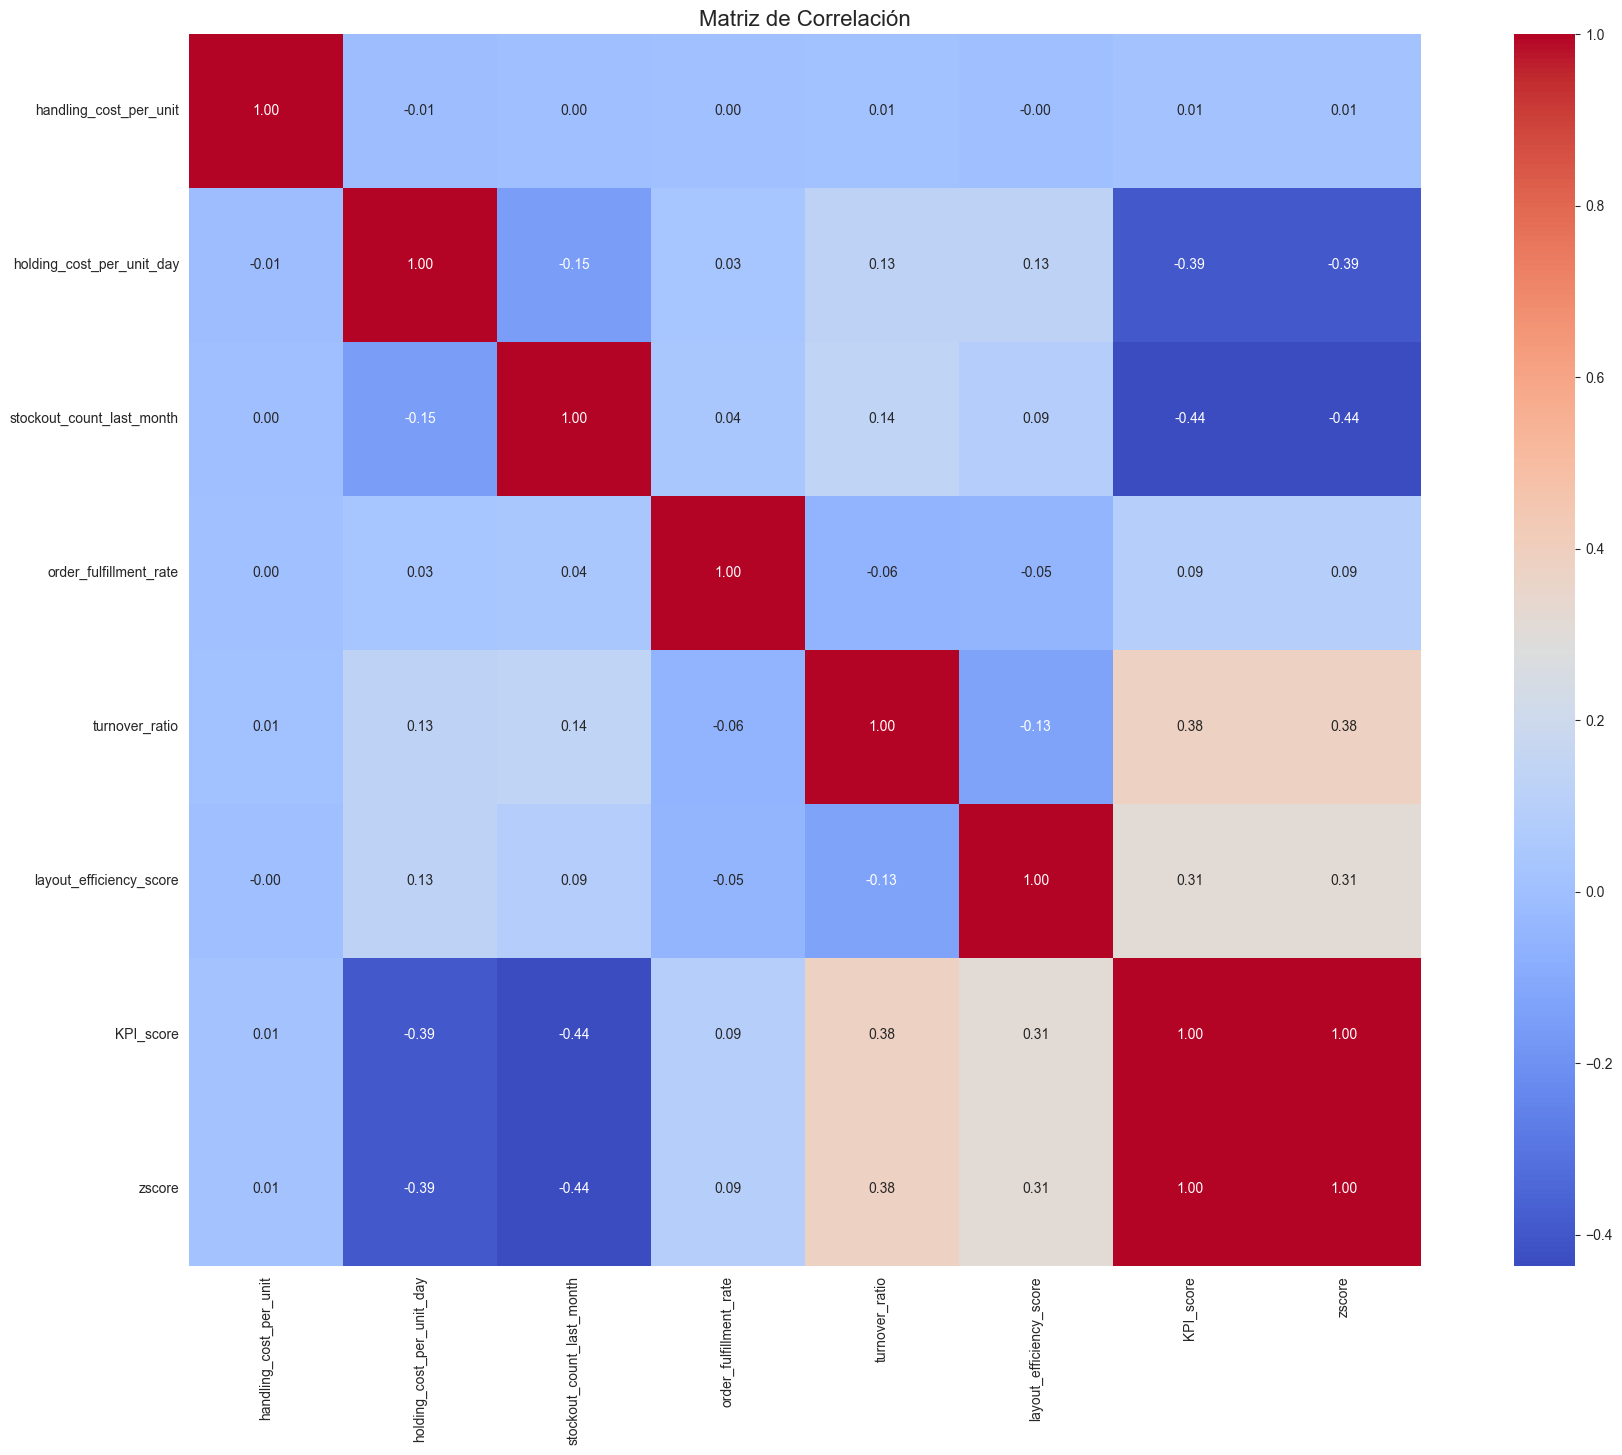

In [35]:
# Limpieza matriz de correlación
numeric_df = dataset_numerico_Transformada.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
pyplot.figure(figsize=(24, 16))
sb.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
pyplot.title('Matriz de Correlación', fontsize=16)
pyplot.show()

# Interpretación matriz de correlación
### Relaciones negativas significativas con inventario: Los costos de mantenimiento de inventario por unidad-día (**holding_cost_per_unit_day**) muestran correlaciones negativas moderadas con las métricas de desempeño clave. Específicamente, existe una correlación de -0.39 con el **KPI_score**, y de -0.44 con el conteo de agotamientos del último mes (**stockout_count_last_month**). Esto sugiere que mayores costos de mantenimiento están asociados con un peor desempeño operativo y mayor frecuencia de quiebres de stock, posiblemente indicando ineficiencias en la gestión de inventario o un balance inadecuado entre costos de almacenamiento y disponibilidad de producto.
### Indicadores de eficiencia operativa: Las variables turnover_ratio y layout_efficiency_score presentan correlaciones positivas moderadas con los indicadores de desempeño (0.38 y 0.31 con KPI_score respectivamente). Esto confirma que una mayor rotación de inventario y mejores diseños de almacén contribuyen directamente a un mejor rendimiento general del sistema. La relación negativa débil entre turnover_ratio y layout_efficiency_score (-0.13) con los costos de mantenimiento refuerza la idea de que la eficiencia operativa puede ayudar a controlar los costos.

# Breve conclusión teniendo en cuenta la matriz de Correlación

### El costo de mantener inventario está afectando negativamente el desempeño: La correlación negativa entre los costos de mantenimiento diario y los indicadores de rendimiento (-0.39) revela un problema crítico: cuando el negocio gasta más en mantener productos almacenados, paradójicamente está experimentando más agotamientos de stock (-0.44) y peor desempeño general. Esto sugiere que la empresa podría estar guardando los productos equivocados o manteniéndolos por demasiado tiempo, generando costos sin mejorar la disponibilidad de lo que realmente necesitan los clientes.
### La rotación de inventario es clave para la rentabilidad: Los productos que se venden más rápidamente (mayor turnover_ratio) están asociados con mejor desempeño operativo (0.38) y menores costos de almacenamiento. Esto indica que el negocio debería enfocarse en identificar y priorizar los productos de alta rotación, mientras reconsidera la estrategia para aquellos artículos que permanecen mucho tiempo en el almacén consumiendo recursos.
### La eficiencia del almacén impacta los resultados: La distribución y organización física del almacén (layout_efficiency_score) tiene una relación positiva con el rendimiento general (0.31). Esto significa que invertir en mejorar la disposición del almacén, facilitando el acceso a los productos más demandados y optimizando los procesos de picking, puede traducirse directamente en mejores resultados operativos y mayor satisfacción del cliente. En resumen, la empresa debería repensar qué está almacenando, por cuánto tiempo, y cómo está organizado su espacio para maximizar la rentabilidad.

In [36]:
# EJECUCION MODELO DE REGRESION LINEAL
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

columns = ['holding_cost_per_unit_day', 'stockout_count_last_month', 'order_fulfillment_rate', 'turnover_ratio', 'layout_efficiency_score','KPI_score']
dataSetFinalModelo = numeric_df[columns].copy()
dataSetFinalModelo['stockout_count_last_month'] = numeric_df['stockout_count_last_month'].astype(float)

dataSetFinalModelo.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2770 entries, 0 to 3202
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   holding_cost_per_unit_day  2770 non-null   float64
 1   stockout_count_last_month  2770 non-null   float64
 2   order_fulfillment_rate     2770 non-null   float64
 3   turnover_ratio             2770 non-null   float64
 4   layout_efficiency_score    2770 non-null   float64
 5   KPI_score                  2770 non-null   float64
dtypes: float64(6)
memory usage: 151.5 KB


In [37]:
variableObjetivo = dataSetFinalModelo['KPI_score']
dataSetFinalModelo = dataSetFinalModelo.drop(columns=['KPI_score'])

X_train, X_test, y_train, y_test = train_test_split(dataSetFinalModelo, variableObjetivo, test_size=0.2,
                                                    random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


#Error absoluto medio
print("MAE:", mean_absolute_error(y_test, y_pred))

#Error cuadratico medio
print("MSE:", mean_squared_error(y_test, y_pred))
#print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred)))
#Coeficiente de determinacion
print("R2 Score:", r2_score(y_test, y_pred))


casoUno = pandas.DataFrame({
    'holding_cost_per_unit_day':[0.58],
    'stockout_count_last_month':[1.0],
    'order_fulfillment_rate':[0.77],
    'turnover_ratio':[12.88],
    'layout_efficiency_score':[0.94]
})

prediccionCasoUno = model.predict(casoUno)
print("Prediccion para el caso 2 para la valiable property_value", prediccionCasoUno[0])

MAE: 0.0012912257682324237
MSE: 2.3142485120161847e-06
R2 Score: 0.9996675787177103
Prediccion para el caso 2 para la valiable property_value 0.7576112218183638


In [38]:
casoDos = pandas.DataFrame({
    'holding_cost_per_unit_day':[1.09],
    'stockout_count_last_month':[3],
    'order_fulfillment_rate':[0.79],
    'turnover_ratio':[10.36],
     'layout_efficiency_score':[0.98]
})

prediccionCasoDos = model.predict(casoDos)
print("Prediccion para el caso 2 para la valiable property_value", prediccionCasoDos[0])
# model.predict(casoDos)

Prediccion para el caso 2 para la valiable property_value 0.6685972092540123


In [39]:
casoTres = pandas.DataFrame({
    'holding_cost_per_unit_day':[0.63],
    'stockout_count_last_month':[5],
    'order_fulfillment_rate':[0.83],
    'turnover_ratio':[5.65],
     'layout_efficiency_score':[0.96]
})
prediccionCasoTres = model.predict(casoTres)
print("Prediccion para el caso 2 para la valiable property_value", prediccionCasoTres[0])

Prediccion para el caso 2 para la valiable property_value 0.5945610602606003


In [40]:
casoCuatro = pandas.DataFrame({
    'holding_cost_per_unit_day':[0.66],
    'stockout_count_last_month':[1],
    'order_fulfillment_rate':[0.99],
    'turnover_ratio':[7.61],
     'layout_efficiency_score':[0.95]
})
prediccionCasoCuatro = model.predict(casoCuatro)
print("Prediccion para el caso 2 para la valiable property_value", prediccionCasoCuatro[0])

Prediccion para el caso 2 para la valiable property_value 0.7290549564943996


In [41]:
# Implementacion modelo analitico - Modelo de clasificacion - Maquinas de vectores de soporte SVM Lineal
# Para el modelo de clasificacion se pueden tomar entre variables categoricas y numericas que tengan bastante relacion entre ellas segun el comportamiento del negocio
# Para saber la correlacion entre variables numericas y caterigoricas no es posible usar matriz de correlacion, para esto se puede aplicar la tecnica MI o ANALISIS DE INFORMACION MUTUA

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

dataSetFinalModeloClas = matrizParaModeloCategorias.copy()
# dataSetFinalModeloClas = dataSetFinalModeloClas.drop(columns=['last_restock_date'])

# dataSetFinalModeloClas.info()

# ANALISIS DE INFORMACION MUTUA - MI
# Tomamos el dataset con todo el procesamiento realizado en nuestro caso seria el de datasetOriginalMatrizTranformada ya que tiene todo el preprocesamiento hasta la aplicacion de las transformadas
# Se calcula la relacion de la varible objetivo con las demas caracterisicas, para este caso se va a tomar como variable objetivo categorizar por zone
y = dataSetFinalModeloClas['zone']

X = dataSetFinalModeloClas.drop(columns=['zone'])

#Aplicamos la transformada de One-hot encodig para convertir a numeros todas las variables categoricas
X = pandas.get_dummies(X, drop_first=True)

X.info()

print("\n\nESULTADOS DE LAS RELACIONES ENTRE VARIABLES CON RESPECTO A LA VARIABLE OBJETIVO zone")

mi = mutual_info_classif(X, y)
mi_series = pandas.Series(mi, index=X.columns).sort_values(ascending=False)

print(mi_series)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   category                   3204 non-null   int64  
 1   stock_level                3204 non-null   int64  
 2   reorder_point              3204 non-null   int64  
 3   reorder_frequency_days     3204 non-null   int64  
 4   lead_time_days             3204 non-null   int64  
 5   daily_demand               3204 non-null   float64
 6   demand_std_dev             3204 non-null   float64
 7   item_popularity_score      3204 non-null   float64
 8   picking_time_seconds       3204 non-null   int64  
 9   handling_cost_per_unit     3204 non-null   float64
 10  unit_price                 3204 non-null   float64
 11  holding_cost_per_unit_day  3204 non-null   float64
 12  stockout_count_last_month  3204 non-null   int64  
 13  order_fulfillment_rate     3204 non-null   float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   KPI_score                3204 non-null   float64
 1   turnover_ratio           3204 non-null   float64
 2   order_fulfillment_rate   3204 non-null   float64
 3   unit_price               3204 non-null   float64
 4   lead_time_days           3204 non-null   int64  
 5   total_orders_last_month  3204 non-null   int64  
 6   zone                     3204 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 175.3 KB


ESULTADOS DE LAS METRICAS DE EVALUACION PARA EL MODELO DE LINEARSVC
Matriz confuncision: 


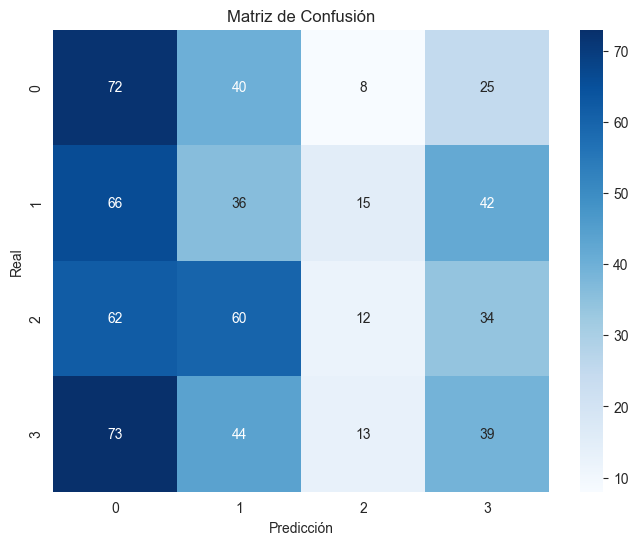

Reporte clasificacion: 
              precision    recall  f1-score   support

           0       0.26      0.50      0.34       145
           1       0.20      0.23      0.21       159
           2       0.25      0.07      0.11       168
           3       0.28      0.23      0.25       169

    accuracy                           0.25       641
   macro avg       0.25      0.26      0.23       641
weighted avg       0.25      0.25      0.23       641



In [42]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

columns = ['KPI_score', 'turnover_ratio', 'order_fulfillment_rate', 'unit_price', 'lead_time_days', 'total_orders_last_month','zone']
dataSetFinalModeloClasificacion = dataSetFinalModeloClas[columns].copy()

#Si es necesario eliminar valores nulos se hace, en este caso la variable objetivo tiene todos las filas
#dataSetFinalModeloClasificacionConNulos = datasetOriginalMatrizModelo[datasetOriginalMatrizModelo['dtir1'].isnull()]
#dataSetFinalModeloClasificacionSinNulos = datasetOriginalMatrizModelo[datasetOriginalMatrizModelo['dtir1'].notnull()]

# Recuerden validar que todas las variables deben ser numericas porque los modelos solo funcionan sobre datos numericos
dataSetFinalModeloClasificacion = pandas.get_dummies(dataSetFinalModeloClasificacion, drop_first=True)
dataSetFinalModeloClasificacion.info()

variableObjetivo = dataSetFinalModeloClasificacion['zone']
datesetCompleteClasificacion = dataSetFinalModeloClasificacion.drop(columns=['zone'])

# Debido a que se tienen valores muy altos dentro de las columnas es necesario escalar los valores, vamos a usar un escalado estandar con la libreria de sklearn
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(datesetCompleteClasificacion)

X_train, X_test, y_train, y_test = train_test_split(datesetCompleteClasificacion, variableObjetivo, test_size=0.2, random_state=42)

svmModel = LinearSVC(C=0.5, class_weight='balanced', random_state=42, max_iter=15000)
svmModel.fit(X_train, y_train)

y_pred = svmModel.predict(X_test)

matrizConfucision = confusion_matrix(y_test, y_pred)
print("\n\nESULTADOS DE LAS METRICAS DE EVALUACION PARA EL MODELO DE LINEARSVC")
print("Matriz confuncision: ")
pyplot.figure(figsize=(8,6))
sb.heatmap(matrizConfucision, annot=True, fmt='d', cmap='Blues')
pyplot.title("Matriz de Confusión")
pyplot.xlabel("Predicción")
pyplot.ylabel("Real")
pyplot.show()

print("Reporte clasificacion: ")
print(classification_report(y_test, y_pred))

cluster
2    1134
0    1107
1     963
Name: count, dtype: int64
         holding_cost_per_unit_day  stockout_count_last_month  \
cluster                                                         
0                         0.569928                   3.598916   
1                         1.505815                   2.747664   
2                         1.120238                   7.156966   

         order_fulfillment_rate  turnover_ratio  layout_efficiency_score  \
cluster                                                                    
0                      0.860515        9.865014                 0.670650   
1                      0.850249        8.210291                 0.623634   
2                      0.838783        6.350247                 0.512601   

         KPI_score  
cluster             
0         0.708789  
1         0.598714  
2         0.499800  


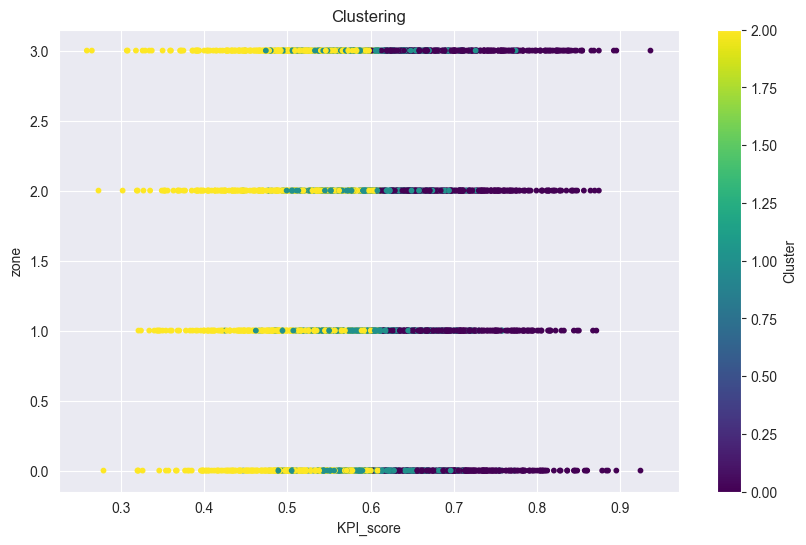

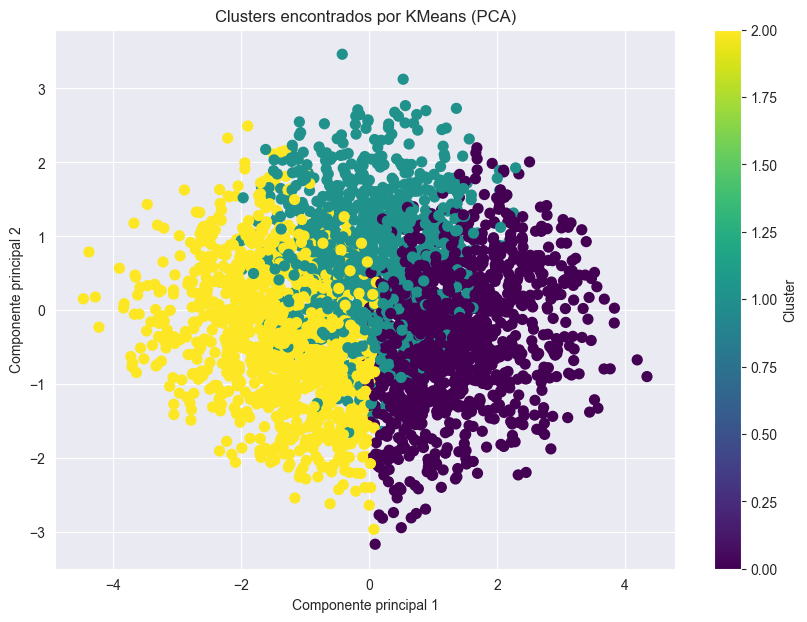

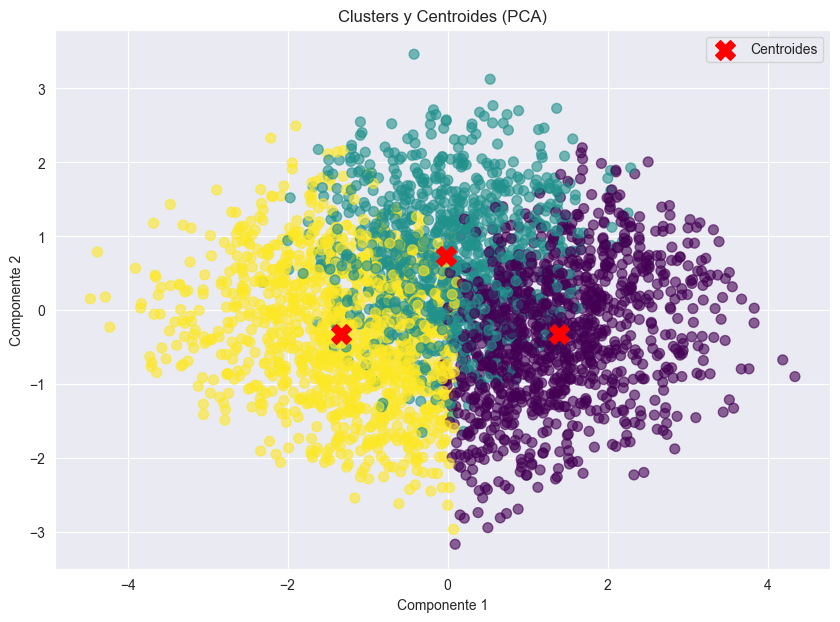

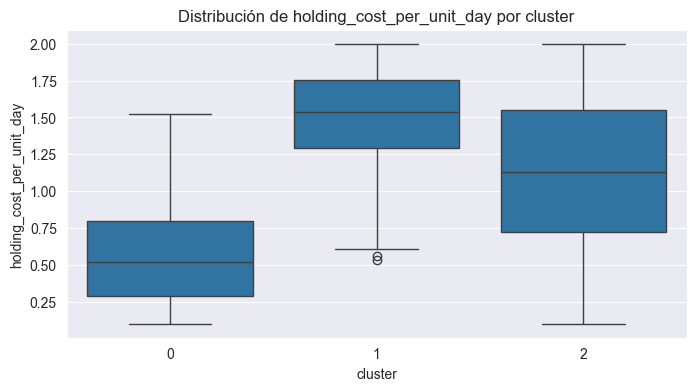

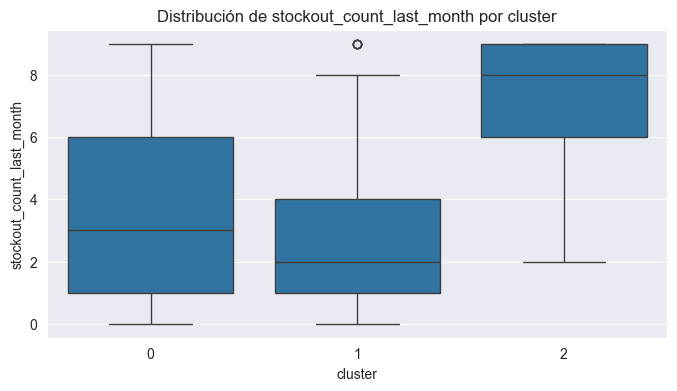

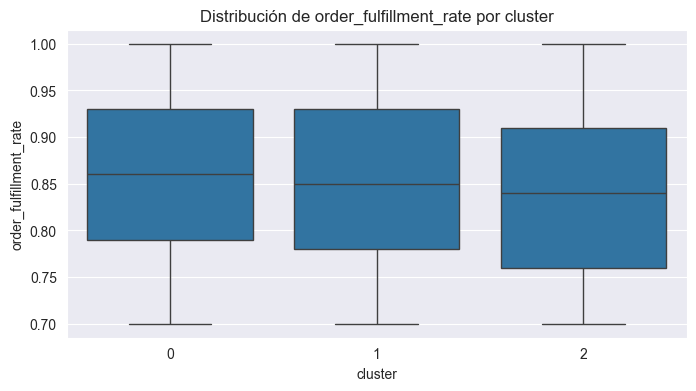

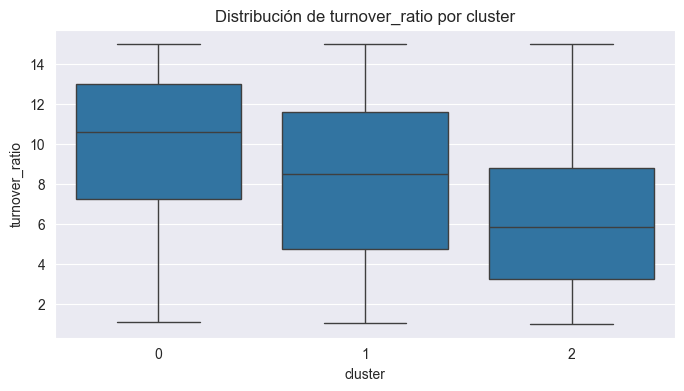

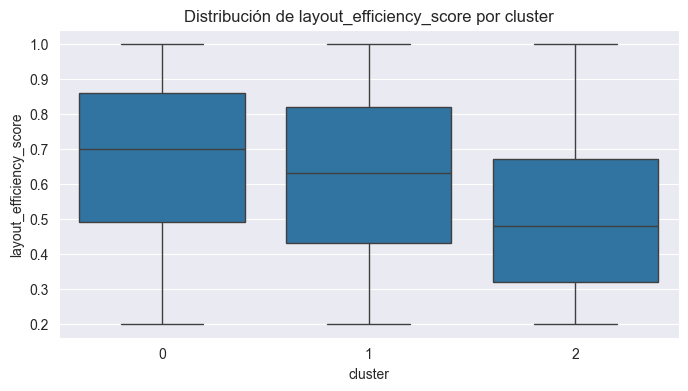

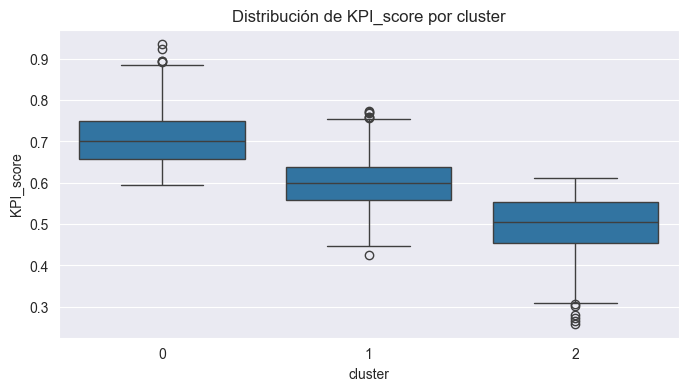

In [43]:
# Implementacion modelo analitico - Modelo de agrupamiento - KMEANS
# Para el modelo de agrupamiento se pueden tomar entre variables categoricas y numericas que tengan bastante relacion entre ellas segun el comportamiento del negocio
# La correlacion entre variables para modelos de agrupamiento se puede calcular usando las tecnicas anteriomente vistas: para variables numericas matriz de correlacion y para variables numericas y catergoricas MI o ANALISIS DE INFORMACION MUTUA. Lo importante siempre es elegir variables que esten relacionadas hacia el negocio.

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#Vamos a elegir variables numericas que conocemos que tienen un nivel de correlacion notable
columns = ['holding_cost_per_unit_day', 'stockout_count_last_month', 'order_fulfillment_rate', 'turnover_ratio', 'layout_efficiency_score', 'KPI_score']
dataSetFinalModeloAgrupamiento = dataSetFinalModeloClas[columns].copy()

# Recuerden validar que todas las variables deben ser numericas porque los modelos solo funcionan sobre datos numericos
#dataSetFinalModeloAgrupamiento = pandas.get_dummies(dataSetFinalModeloAgrupamiento, drop_first=True)
#dataSetFinalModeloAgrupamiento.info()

# Se aplica un valor de escalado estadar a los datos del dataframe para mejorar la efectividad del KMeans
scaler = StandardScaler()
datesetCompleteKmeansScaler = scaler.fit_transform(dataSetFinalModeloAgrupamiento)

# Creamos el modelo de Kmeans
kmeans = KMeans(n_clusters=3, random_state=42)
dataSetFinalModeloClas['cluster'] = kmeans.fit_predict(datesetCompleteKmeansScaler)

#dataSetFinalModeloClas.info()

# 5. Ver distribución
print(dataSetFinalModeloClas['cluster'].value_counts())
cluster_summary = dataSetFinalModeloClas.groupby('cluster')[columns].mean()
print(cluster_summary)

plt.figure(figsize=(10, 6))
plt.scatter(dataSetFinalModeloClas['KPI_score'], dataSetFinalModeloClas['zone'], c=dataSetFinalModeloClas['cluster'], cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.title('Clustering')
plt.xlabel('KPI_score')
plt.ylabel('zone')
plt.show()

# Ver distribucion de los datos categoricos
pca = PCA(n_components=2)
X_pca = pca.fit_transform(datesetCompleteKmeansScaler)
labels = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters encontrados por KMeans (PCA)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Ver distribucion de los datos categoricos con centroides
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroides')
plt.title('Clusters y Centroides (PCA)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.grid(True)
plt.show()

# Ver distribucion del cluster por variable
for col in columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=dataSetFinalModeloClas['cluster'], y=dataSetFinalModeloClas[col])
    plt.title(f"Distribución de {col} por cluster")
    plt.show()